# 라이브러리 불러오기

In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# 데이터 정보
## 이 데이터는 2006년 미국 뉴욕주 사라토가 카운티(Saratoga County)의 주택에 관한 정보를 담고 있습니다. 데이터셋의 형식은 데이터 프레임(data frame)이며, 총 1728개의 관측값과 16개의 변수가 있습니다. 여기에는 다음과 같은 변수가 포함되어 있습니다:


| 변수명          | 설명                               |
|----------------|------------------------------------|
| price          | 가격 (미국 달러)                   |
| lotSize        | 부지의 크기 (에이커)              |
| age            | 주택의 연식 (년)                   |
| landValue      | 토지 가치 (미국 달러)              |
| livingArea     | 거실 면적 (평방 피트)            |
| pctCollege     | 대학 졸업자 비율 (%)              |
| bedrooms       | 침실 수                           |
| fireplaces     | 벽난로 수                         |
| bathrooms      | 화장실 수 (하프 화장실은 샤워나 욕조가 없음) |
| rooms          | 방 수                             |
| heating        | 난방 시스템 종류                  |
| fuel           | 난방용 연료                       |
| sewer          | 하수도 시스템 종류                |
| waterfront     | 부동산에 해안이 포함되어 있는지 여부 |
| newConstruction | 부동산이 신축인지 여부            |
| centralAir     | 집에 중앙 에어컨이 있는지 여부     |


In [2]:
# 데이터 불러오기
houses_data = sm.datasets.get_rdataset("SaratogaHouses", "mosaicData")
houses = houses_data.data
houses.head(3)

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.00,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.50,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.00,8,hot water/steam,gas,public/commercial,No,No,No


In [3]:
# documents
print(houses_data.__doc__)

.. container::

   ============== ===============
   SaratogaHouses R Documentation
   ============== ===============

   .. rubric:: Houses in Saratoga County (2006)
      :name: SaratogaHouses

   .. rubric:: Description
      :name: description

   Data on houses in Saratoga County, New York, USA in 2006

   .. rubric:: Usage
      :name: usage

   .. code:: R

      data(SaratogaHouses)

   .. rubric:: Format
      :name: format

   A data frame with 1728 observations on the following 16 variables.

   -  ``price`` price (US dollars)

   -  ``lotSize`` size of lot (acres)

   -  ``age`` age of house (years)

   -  ``landValue`` value of land (US dollars)

   -  ``livingArea`` living are (square feet)

   -  ``pctCollege`` percent of neighborhood that graduated college

   -  ``bedrooms`` number of bedrooms

   -  ``fireplaces`` number of fireplaces

   -  ``bathrooms`` number of bathrooms (half bathrooms have no shower
      or tub)

   -  ``rooms`` number of rooms

   -  ``heating

## Q. 데이터 정보는 어떠한가?

In [4]:
# 데이터 정보 확인
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


## Q. 데이터 요약 통계량은 어떠한가?

In [5]:
# 데이터 요약 통계량 확인
houses.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00
mean,211966.71,0.50,27.92,34557.19,1754.98,55.57,3.15,0.60,1.90,7.04
std,98441.39,0.70,29.21,35021.17,619.94,10.33,0.82,0.56,0.66,2.32
...,...,...,...,...,...,...,...,...,...,...
50%,189900.00,0.37,19.00,25000.00,1634.50,57.00,3.00,1.00,2.00,7.00
75%,259000.00,0.54,34.00,40200.00,2137.75,64.00,4.00,1.00,2.50,8.25
max,775000.00,12.20,225.00,412600.00,5228.00,82.00,7.00,4.00,4.50,12.00


# Variation (변동성, 변량, 분산도)

## Q. numeric 변수들의 분포는 어떠한가?
### numeric 변수들의 각 분포는 아래와 같다.
#### 부지의 크기(lotSize): 0에서 1 사이의 대부분의 값 존재(약 95%)
#### 벽난로 수(fireplaces): 0과 1이 거의 대부분 분포해있고, 2에 해당하는 값 42개 존재

최솟값: 0.0 최댓값: 12.2
lotSize
0.46    85
0.15    74
0.16    72
1.00    64
0.17    41
Name: count, dtype: int64


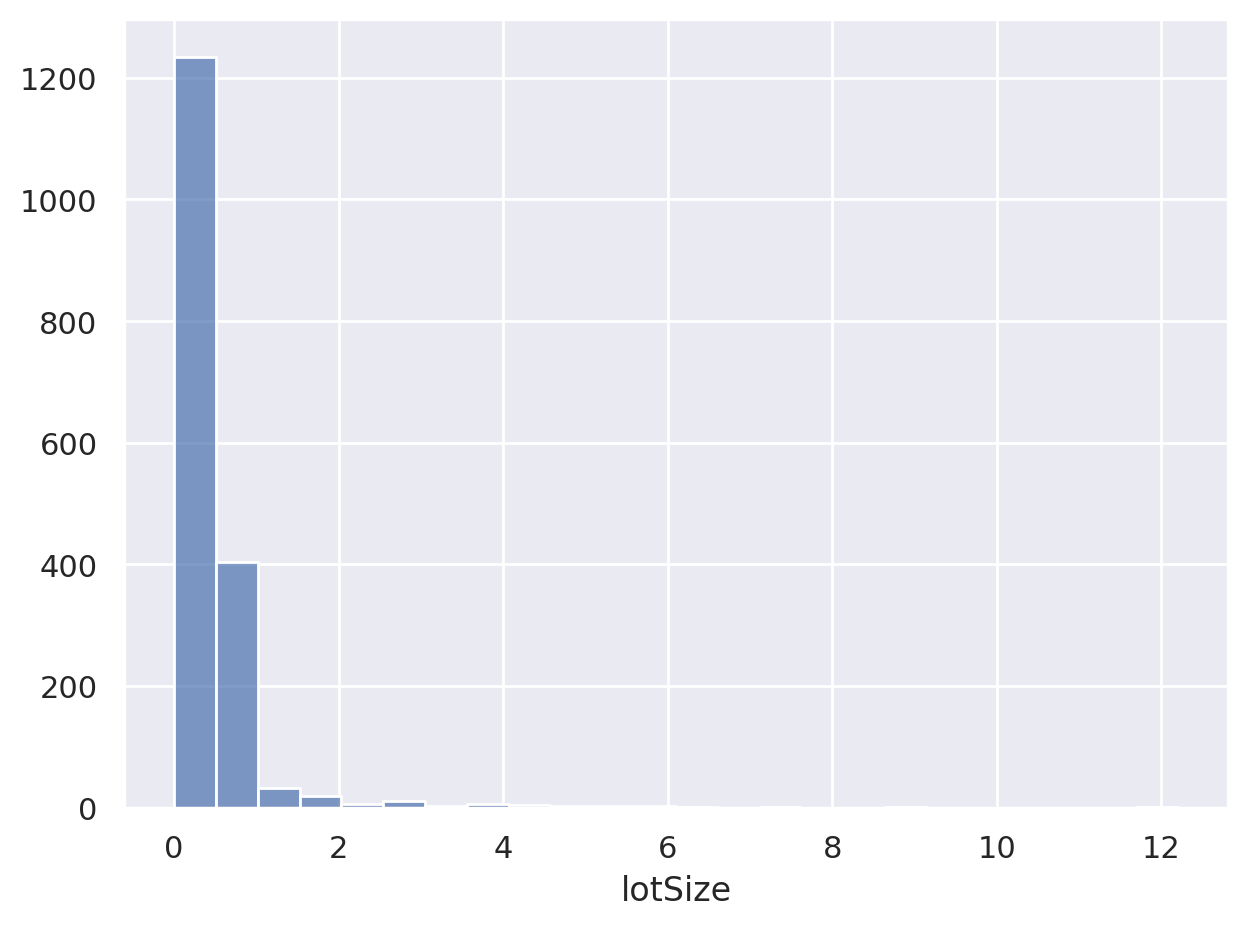

최솟값: 0 최댓값: 225
age
19    93
16    88
18    88
0     83
1     75
Name: count, dtype: int64


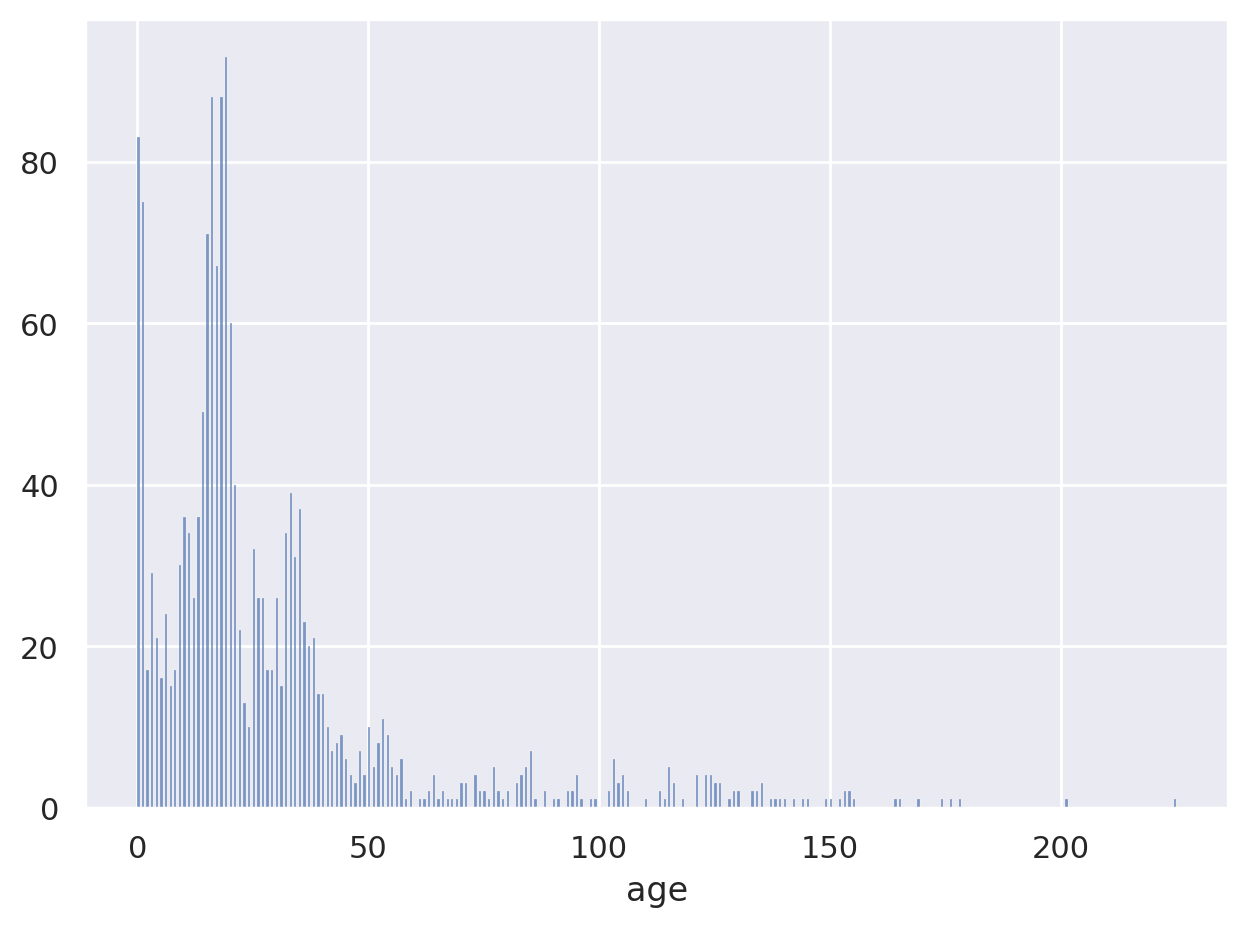

최솟값: 616 최댓값: 5228
livingArea
1480    49
912     40
2310    16
960     15
1184    14
Name: count, dtype: int64


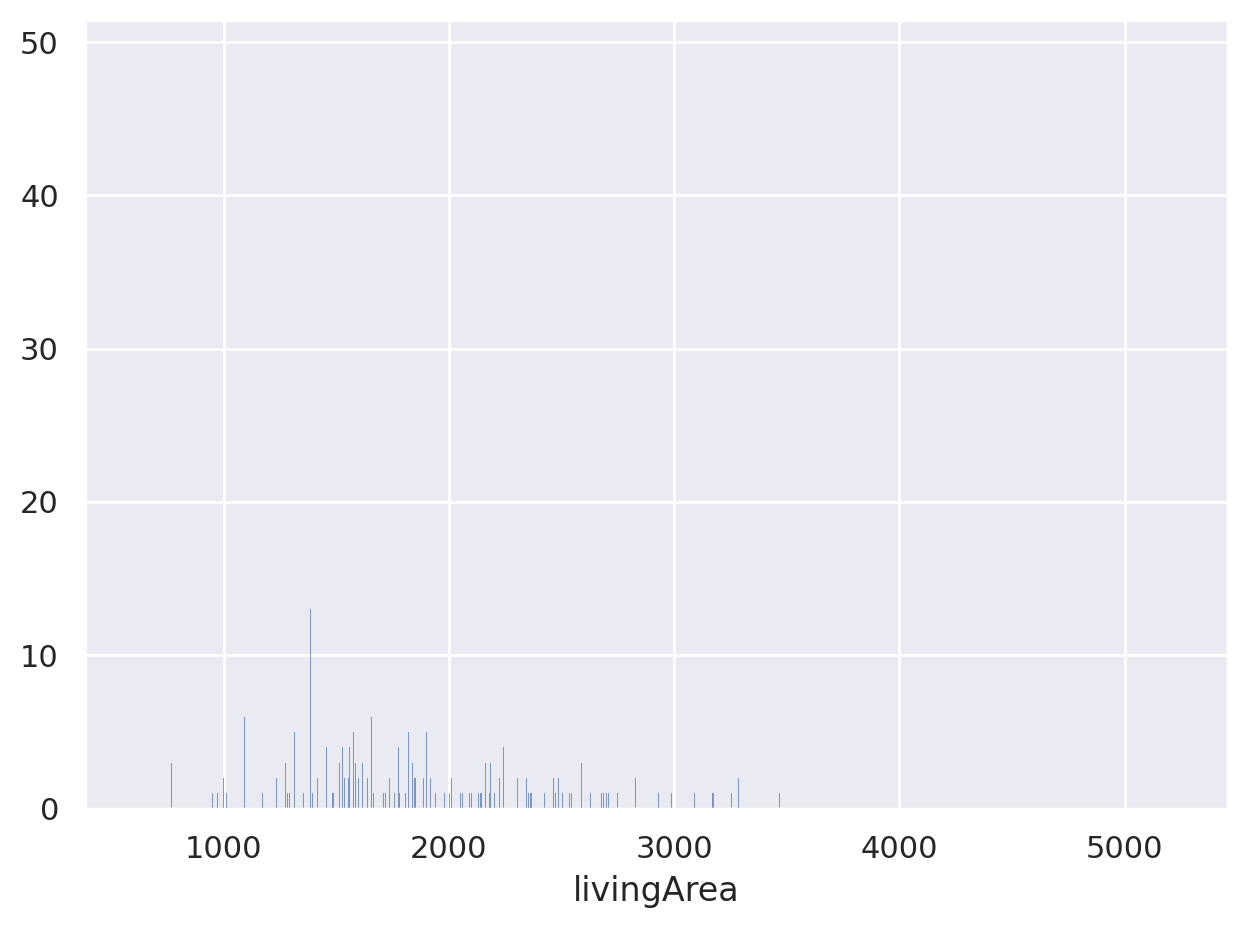

최솟값: 20 최댓값: 82
pctCollege
64    405
57    272
63    195
62    133
40    128
Name: count, dtype: int64


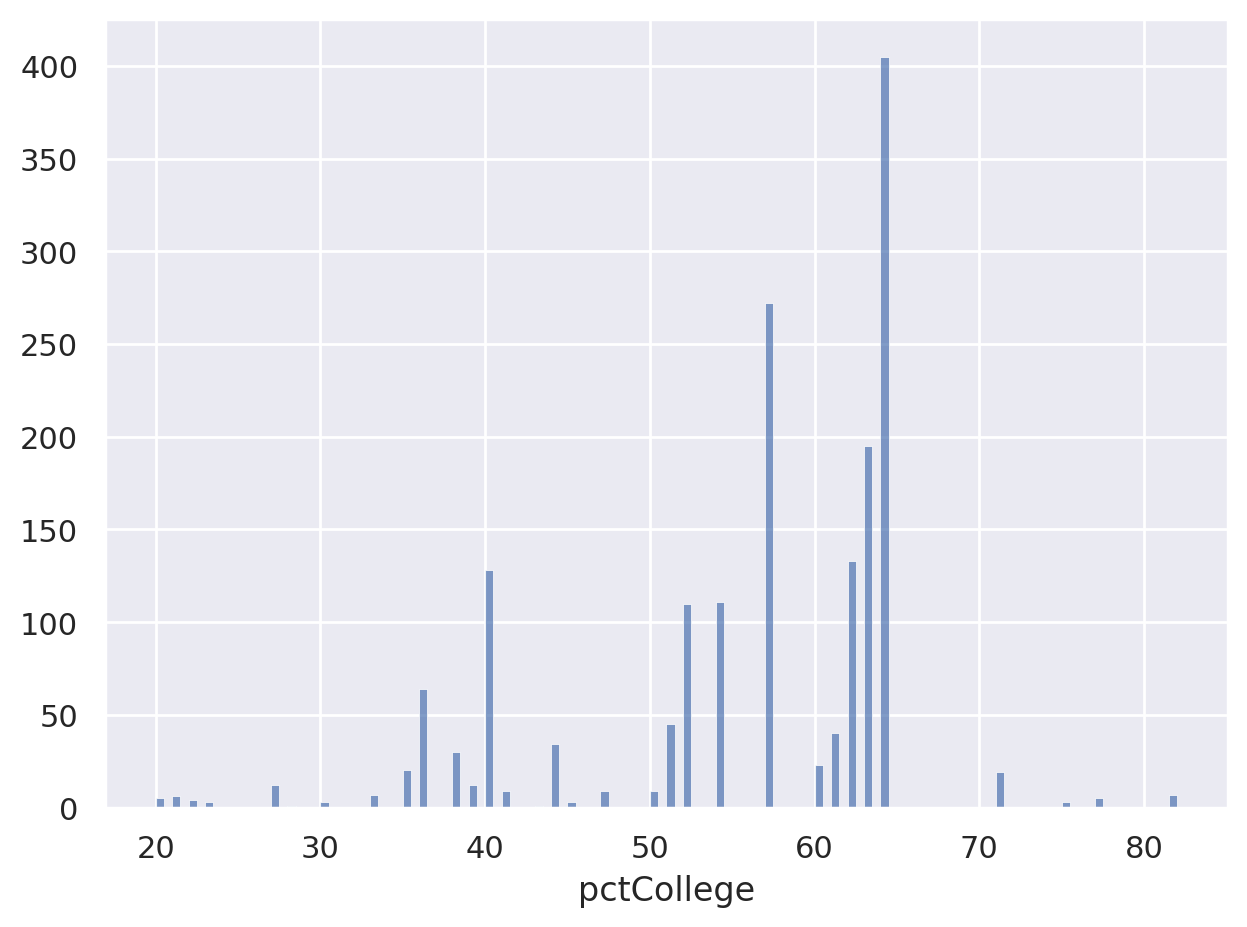

최솟값: 1 최댓값: 7
bedrooms
3    822
4    487
2    348
5     53
6      8
Name: count, dtype: int64


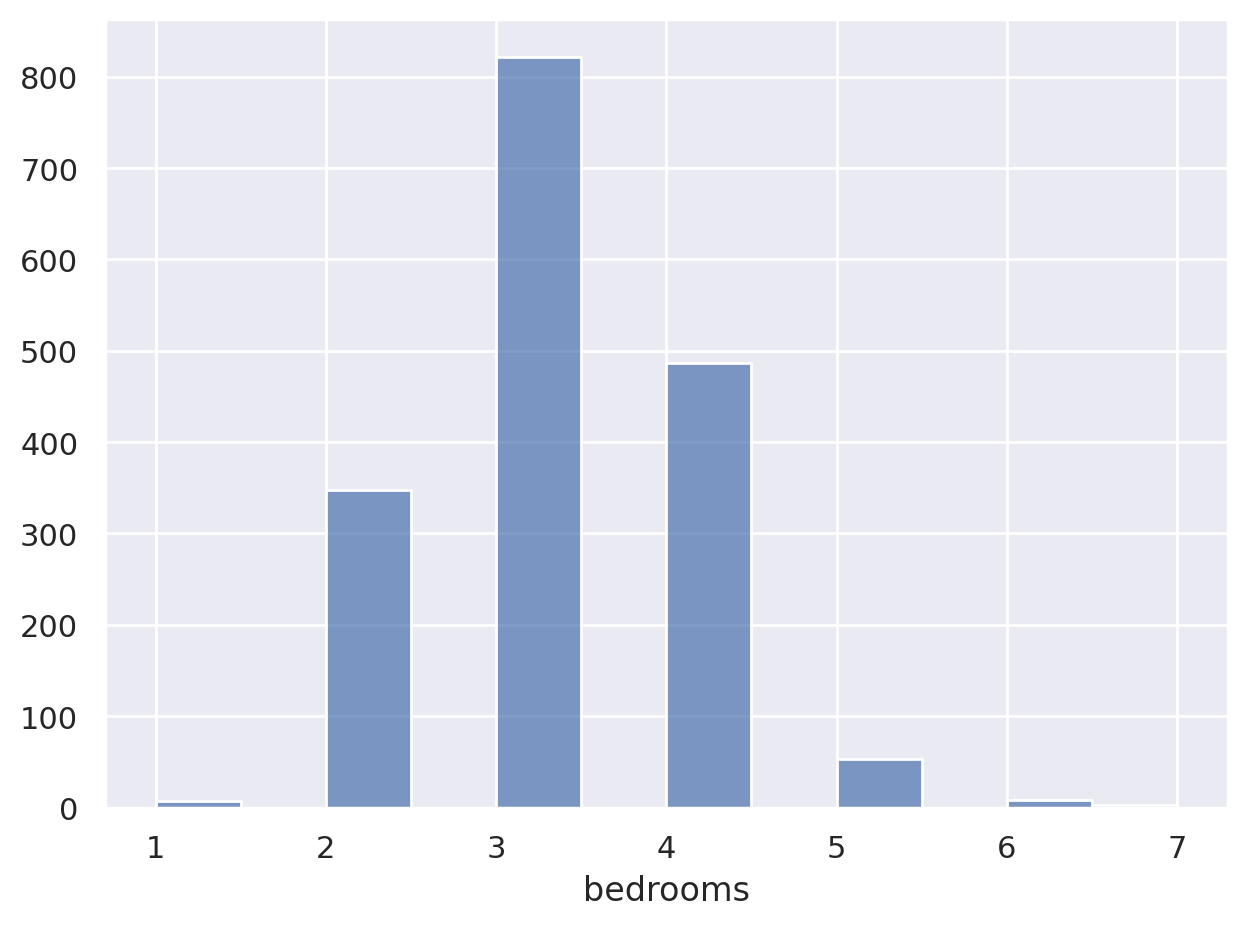

최솟값: 0 최댓값: 4
fireplaces
1    942
0    740
2     42
4      2
3      2
Name: count, dtype: int64


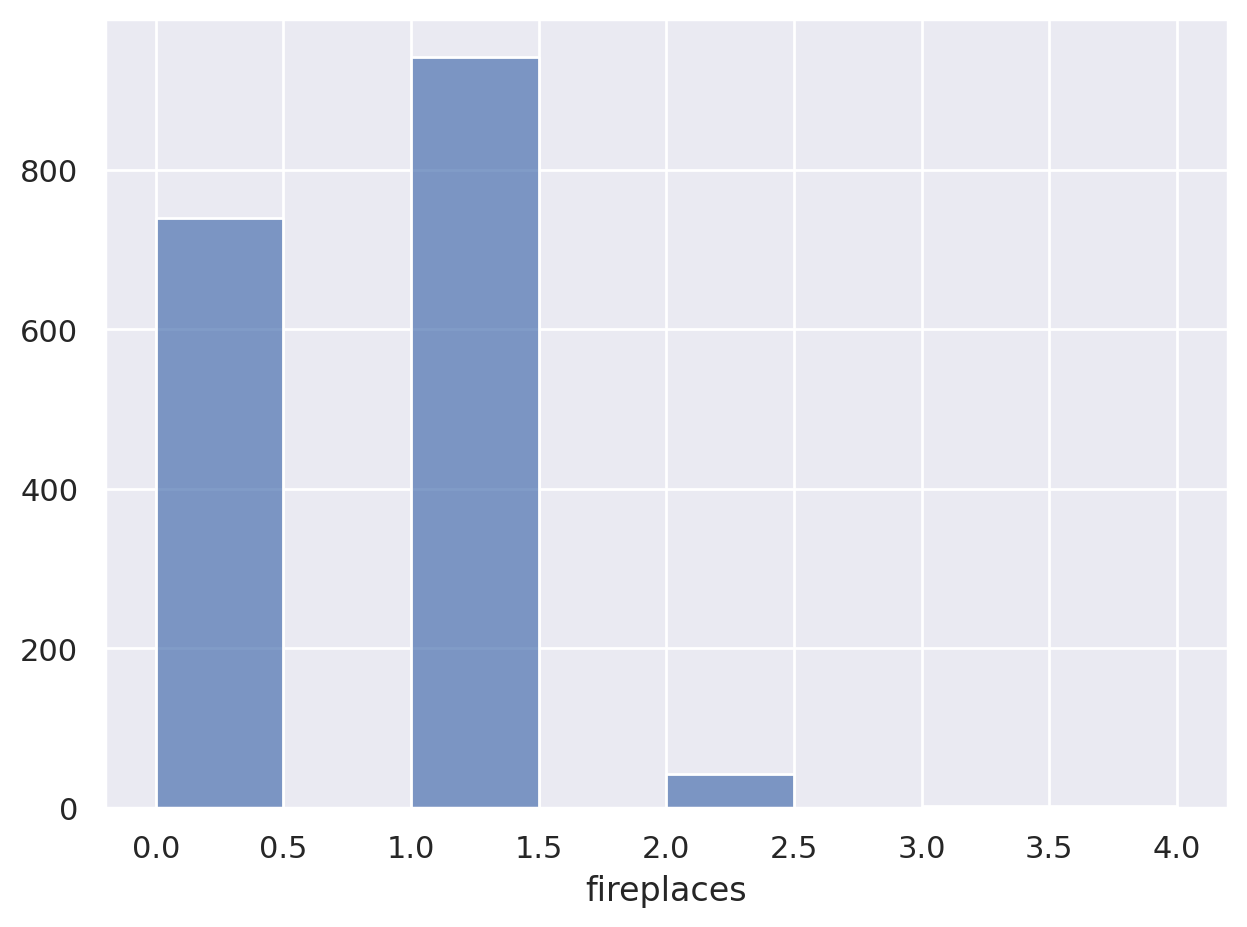

최솟값: 0.0 최댓값: 4.5
bathrooms
2.50    549
1.50    497
1.00    325
2.00    255
3.00     56
Name: count, dtype: int64


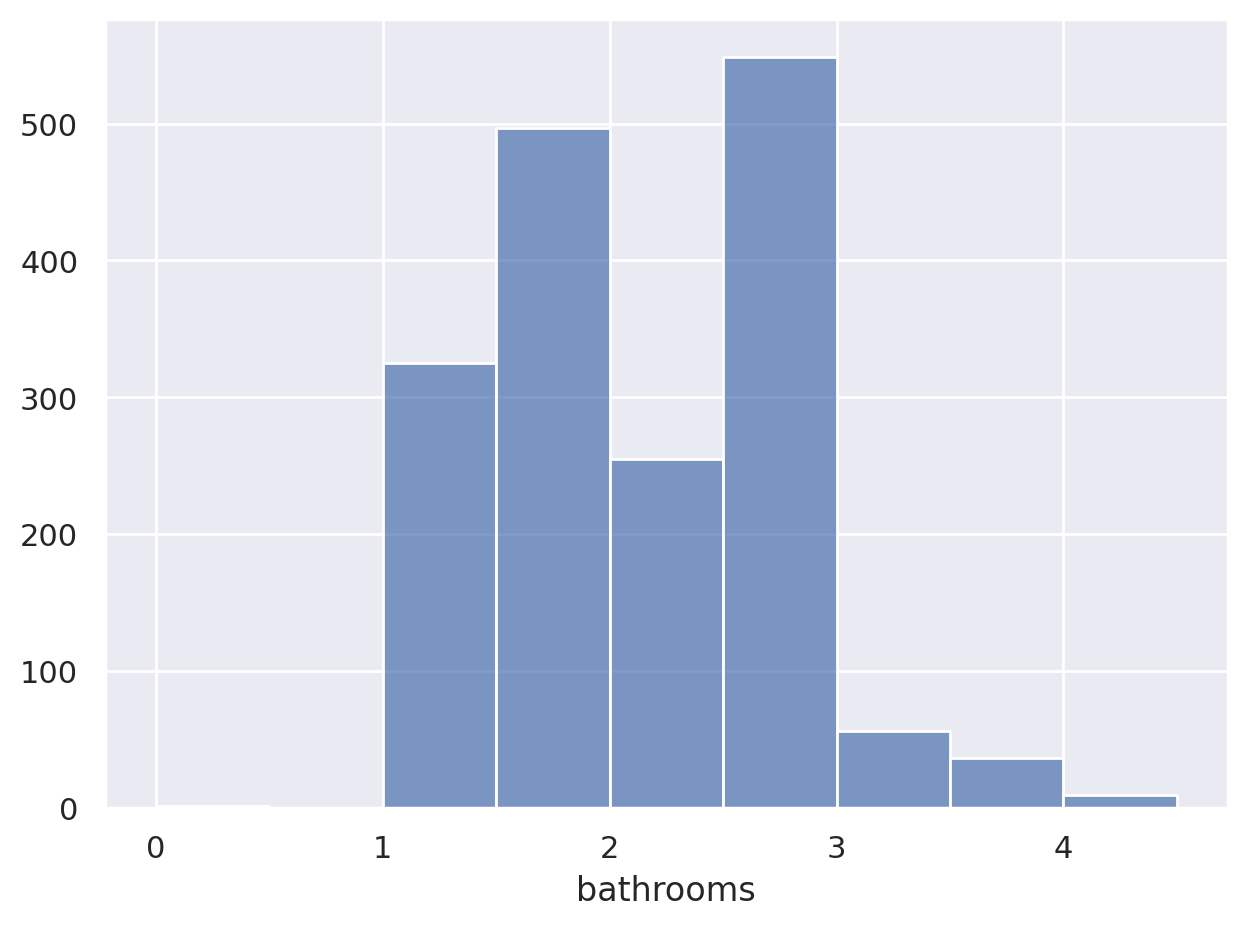

최솟값: 2 최댓값: 12
rooms
7    305
8    258
6    247
5    223
4    181
Name: count, dtype: int64


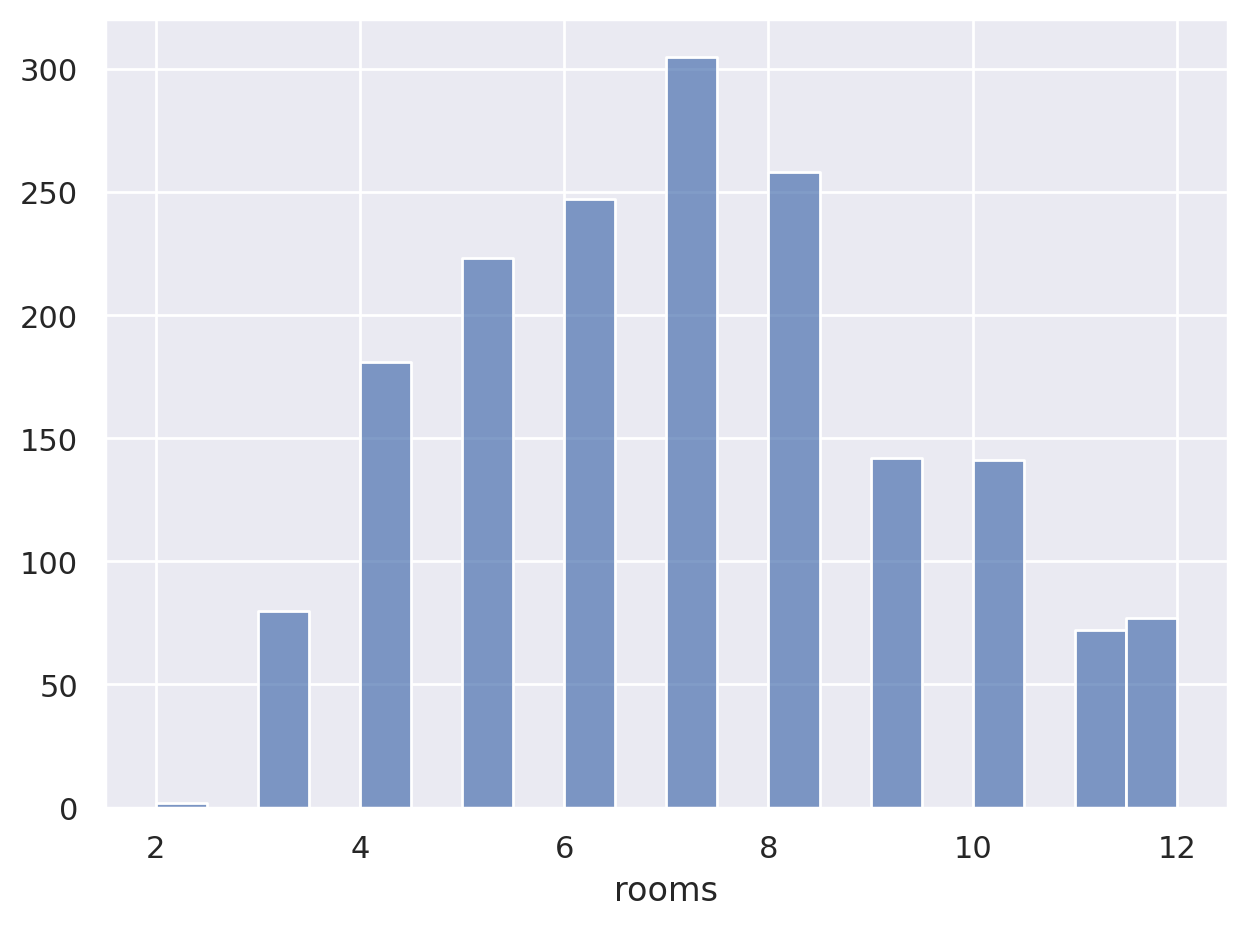

In [55]:
# Q. numeric 변수들의 분포는 어떠한가?
numeric_list = ['lotSize', 'age', 'livingArea', 'pctCollege', 'bedrooms', 'fireplaces', 'bathrooms', 'rooms']

for numeric in numeric_list:
    print('최솟값:', houses[numeric].min(), '최댓값:', houses[numeric].max())
    print(houses[numeric].value_counts().head())
    (
        so.Plot(houses, x = numeric)
        .add(so.Bars(), so.Hist(binwidth=.5))
    ).show()

In [65]:
# lotSzie 0에서 1 사이 값 1728개 중에서 1638개 존재
houses[houses['lotSize']<=1]

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.00,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.50,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.00,8,hot water/steam,gas,public/commercial,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,194900,0.39,9,20400,1099,51,2,0,1.00,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.00,7,hot air,gas,public/commercial,No,No,No
1727,111300,0.59,86,26000,1959,51,3,0,1.00,6,hot air,gas,septic,No,No,No


## Q. categorical 변수들의 분포는 어떠한가?
### A. 각 categorical 변수들의 분포는 아래와 같다.
#### 난방 시스템 종류(heating): hot air 1121 / electric 305 / hot water,steam 302
#### 난방용 연료(fuel): gas 1197 / electric 315 / oil 216
#### 하수도 시스템 종류(sewer): public,commercial 1213 / septic 503 / none 12
#### 부동산에 해안이 포함되어 있는지 여부(waterfront): No 1713 / Yes 15
#### 부동산이 신축인지 여부(newConstruction): No 1647 / Yes 81
#### 집에 중앙 에어컨이 있는지 여부(CentralAir): No 1093 / Yes 635

heating
hot air            1121
electric            305
hot water/steam     302
Name: count, dtype: int64


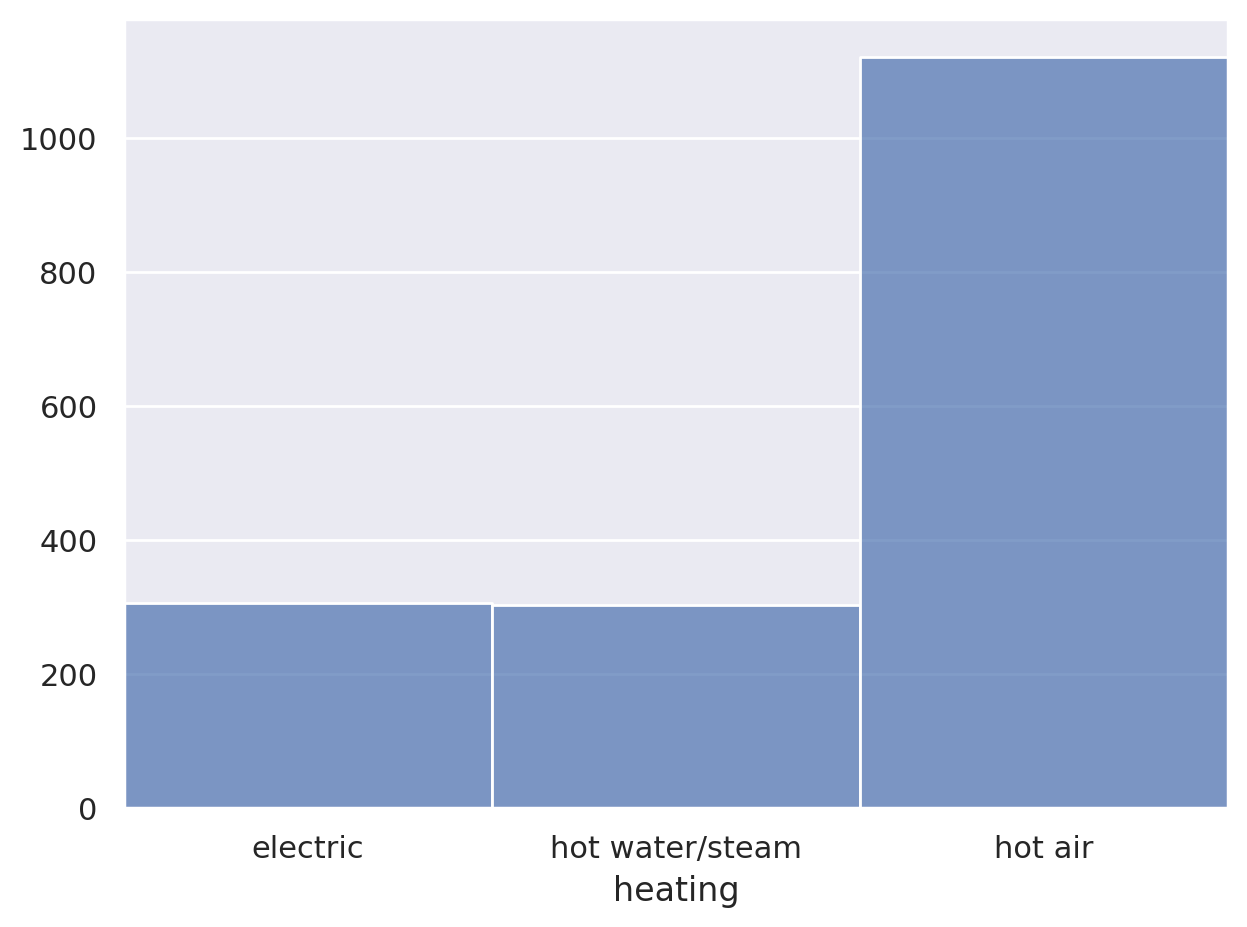

fuel
gas         1197
electric     315
oil          216
Name: count, dtype: int64


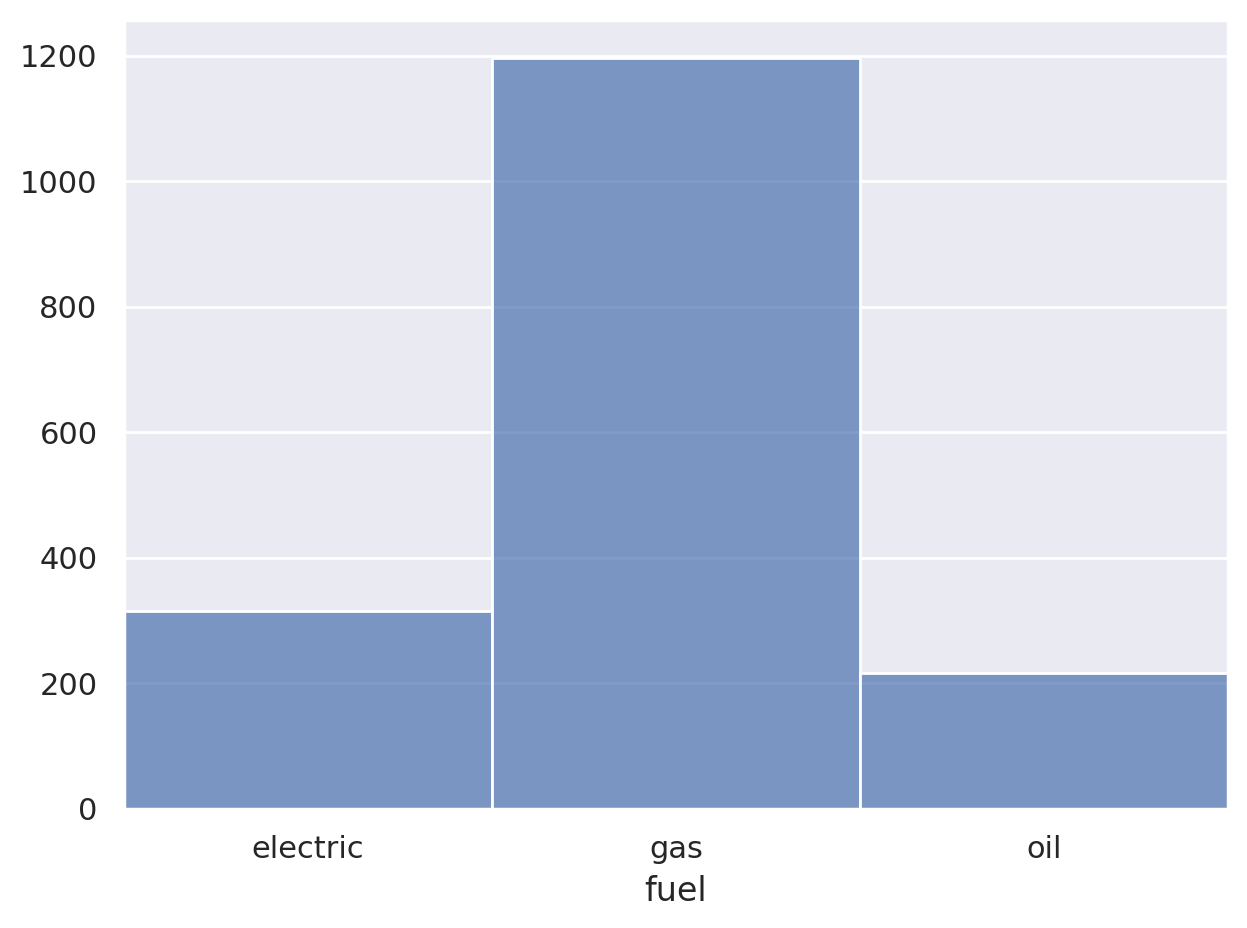

sewer
public/commercial    1213
septic                503
none                   12
Name: count, dtype: int64


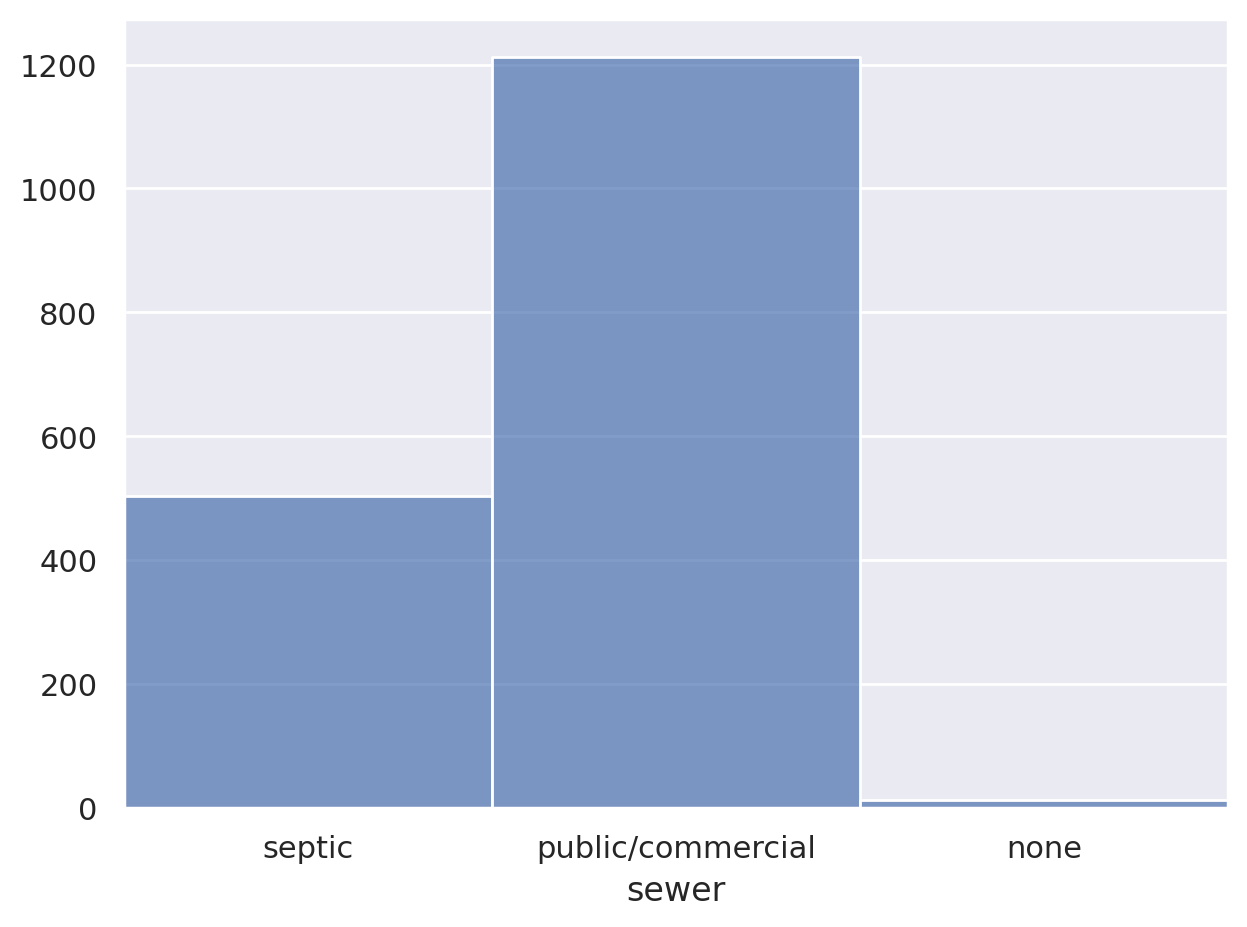

waterfront
No     1713
Yes      15
Name: count, dtype: int64


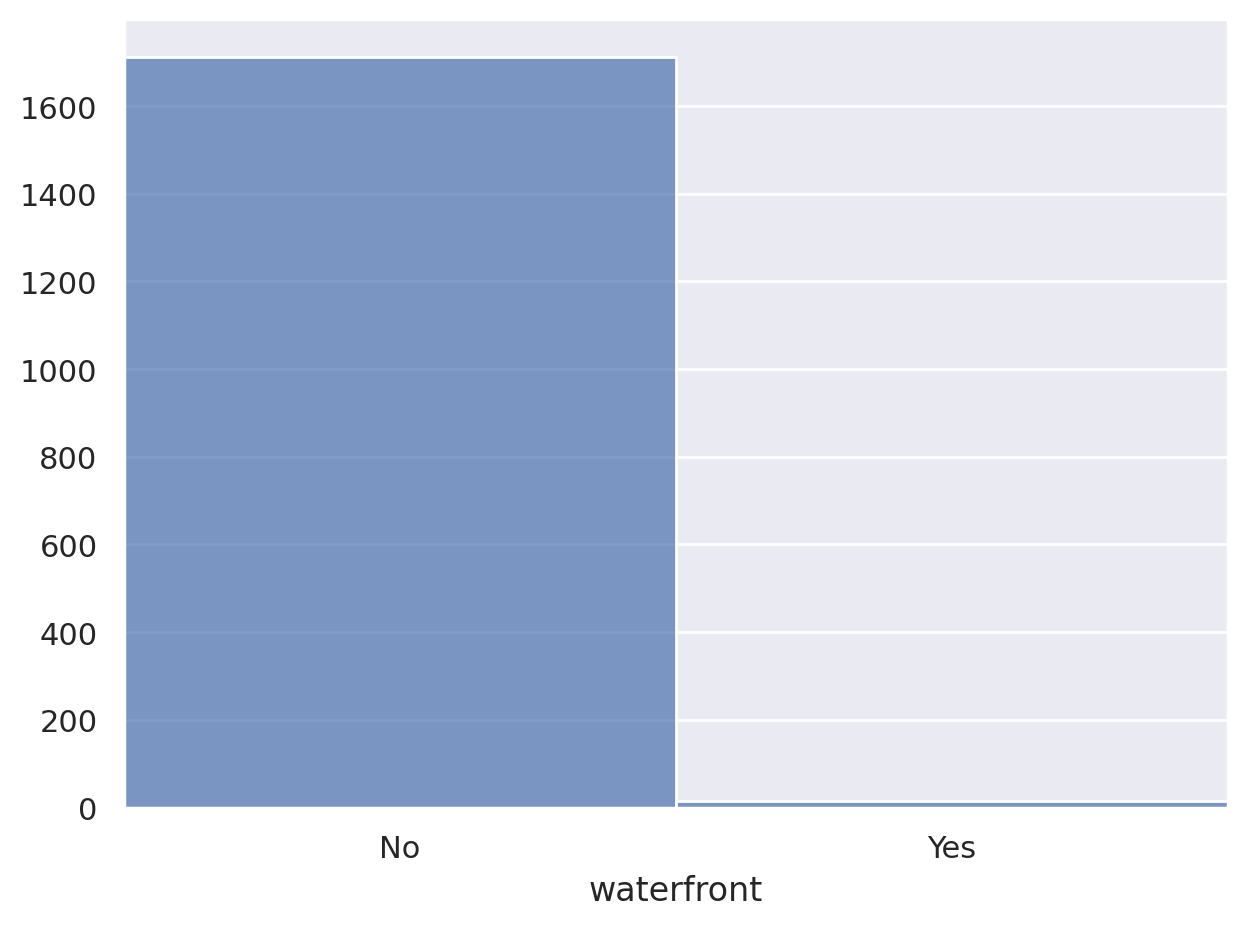

newConstruction
No     1647
Yes      81
Name: count, dtype: int64


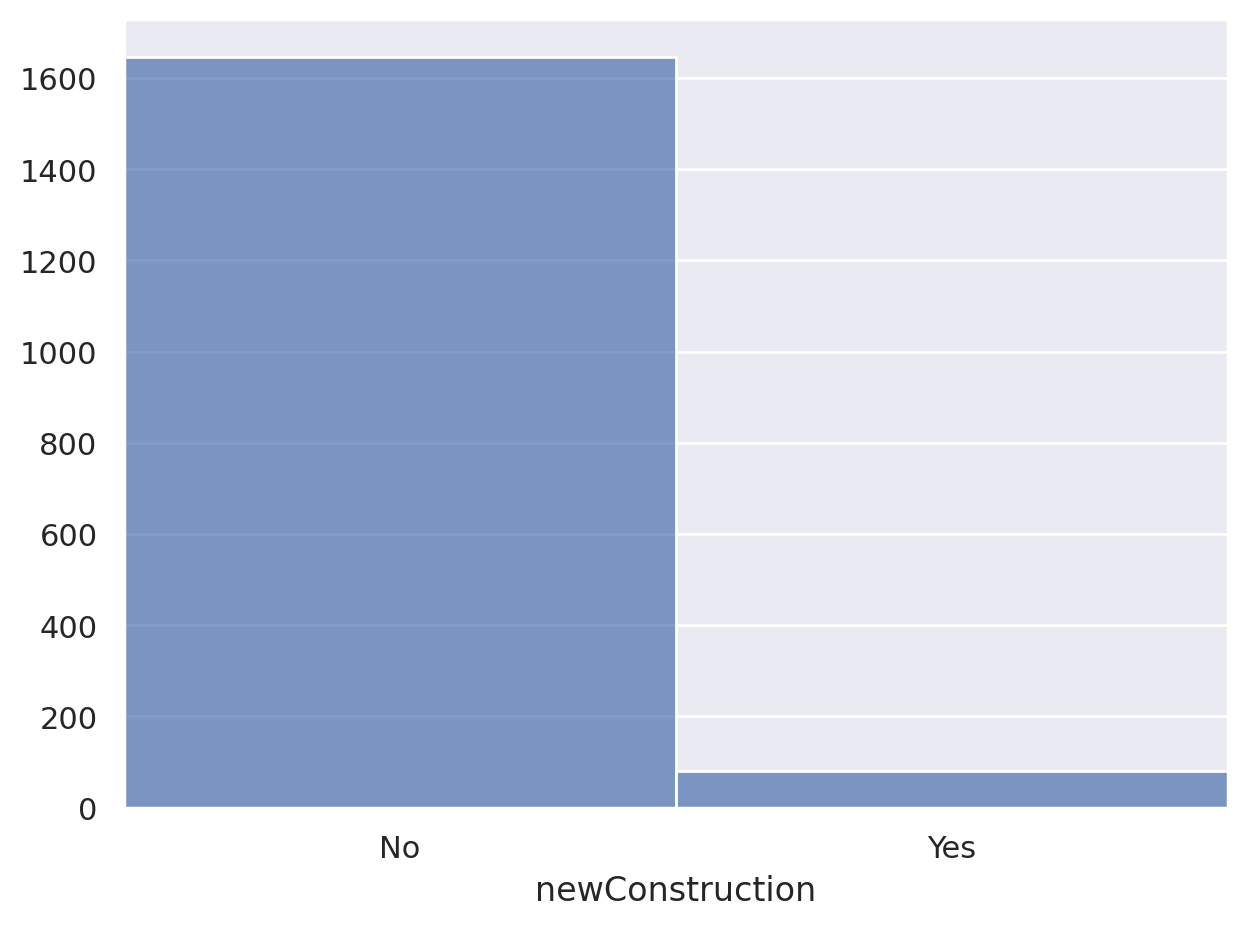

centralAir
No     1093
Yes     635
Name: count, dtype: int64


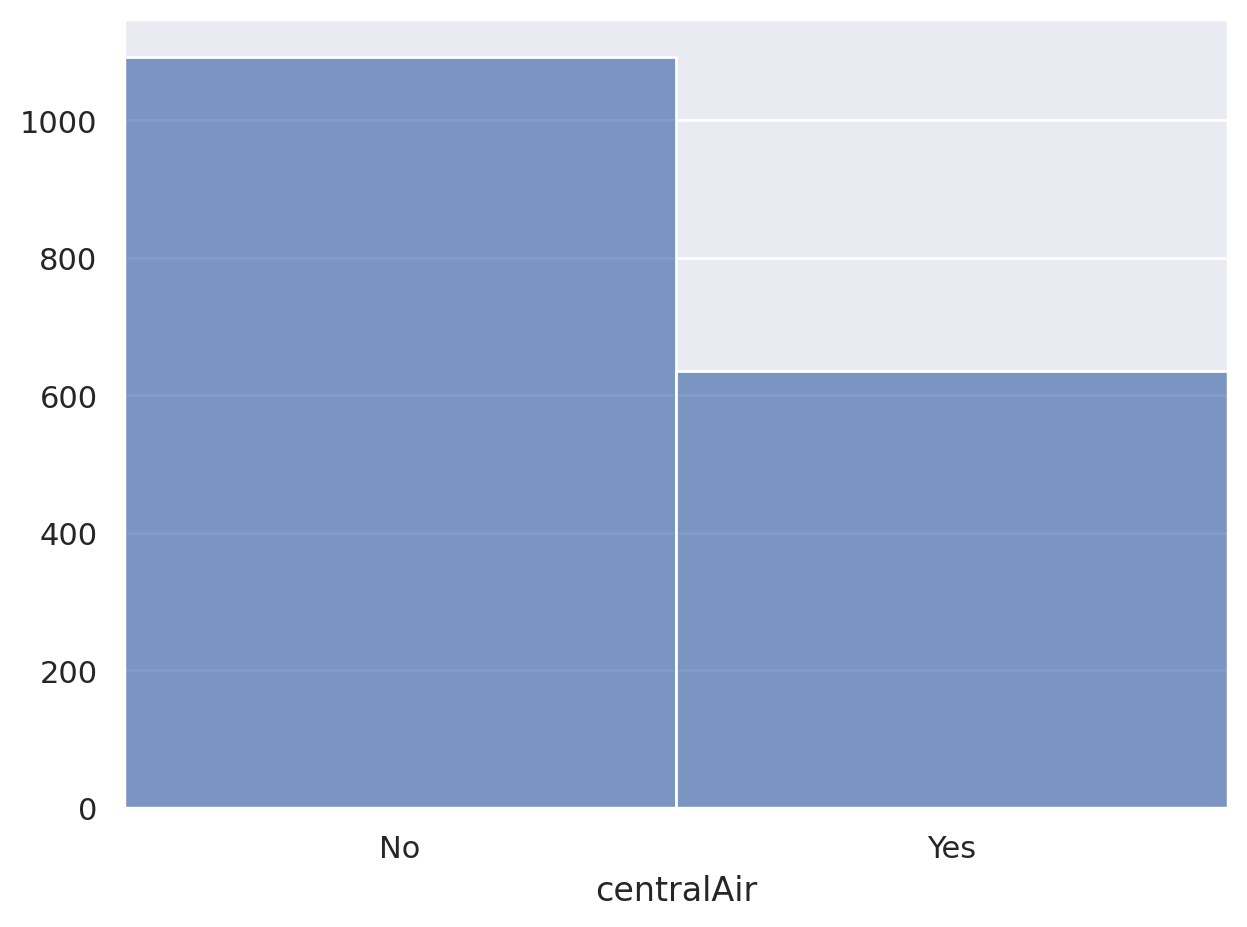

In [10]:
categorical_list = ['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir']

for categorical in categorical_list:
    print(houses[categorical].value_counts().head())
    (
        so.Plot(houses, x = categorical)
        .add(so.Bars(), so.Hist(binwidth=.5))
    ).show()

# Covariation (공변성, 공분산도)

## Q. numeric 변수들과 가격(price)는 어떤 관계가 있는가?
### A. 거실 면적(livingArea)는 price와 선형 관계가 있음을 확인할 수 있다.

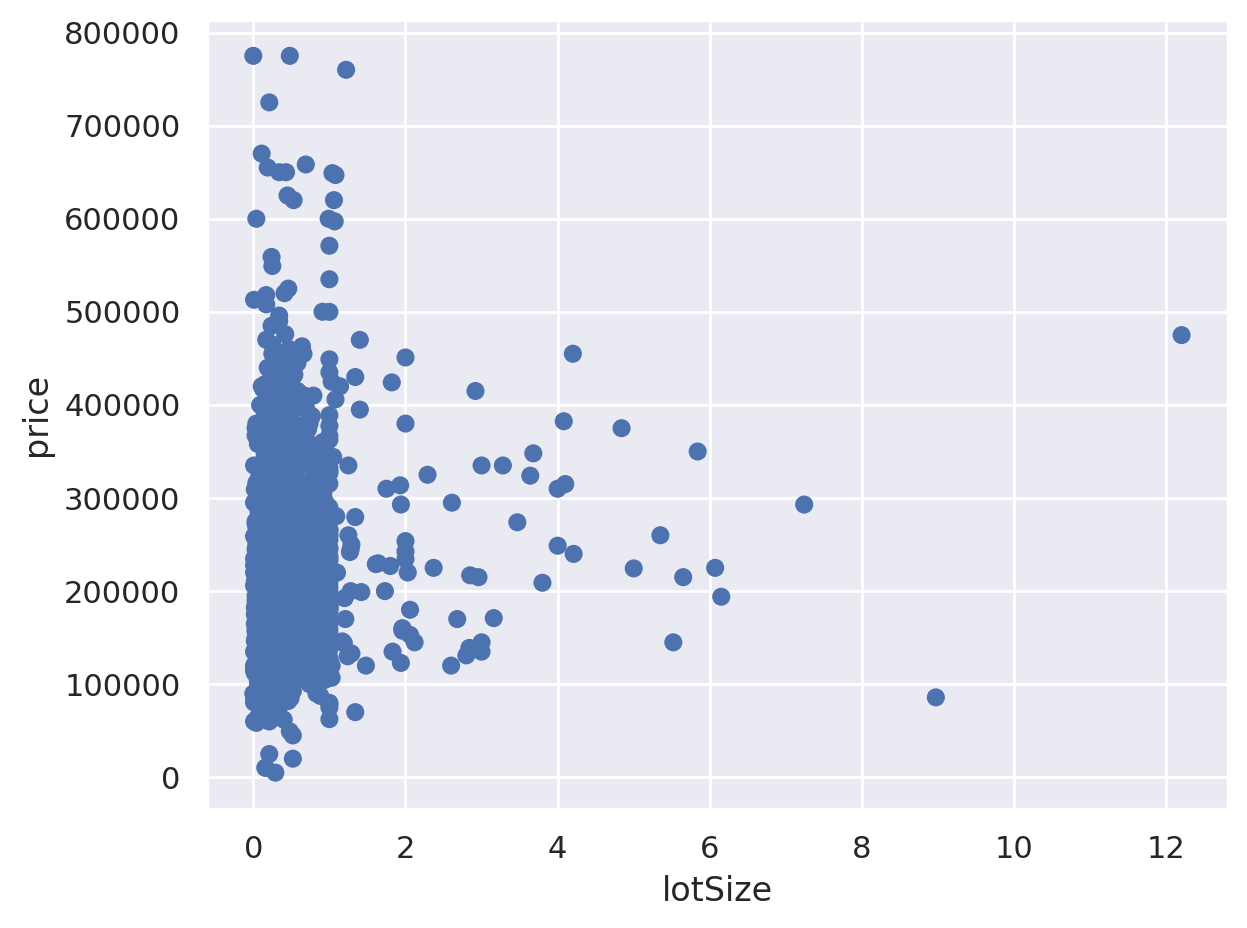

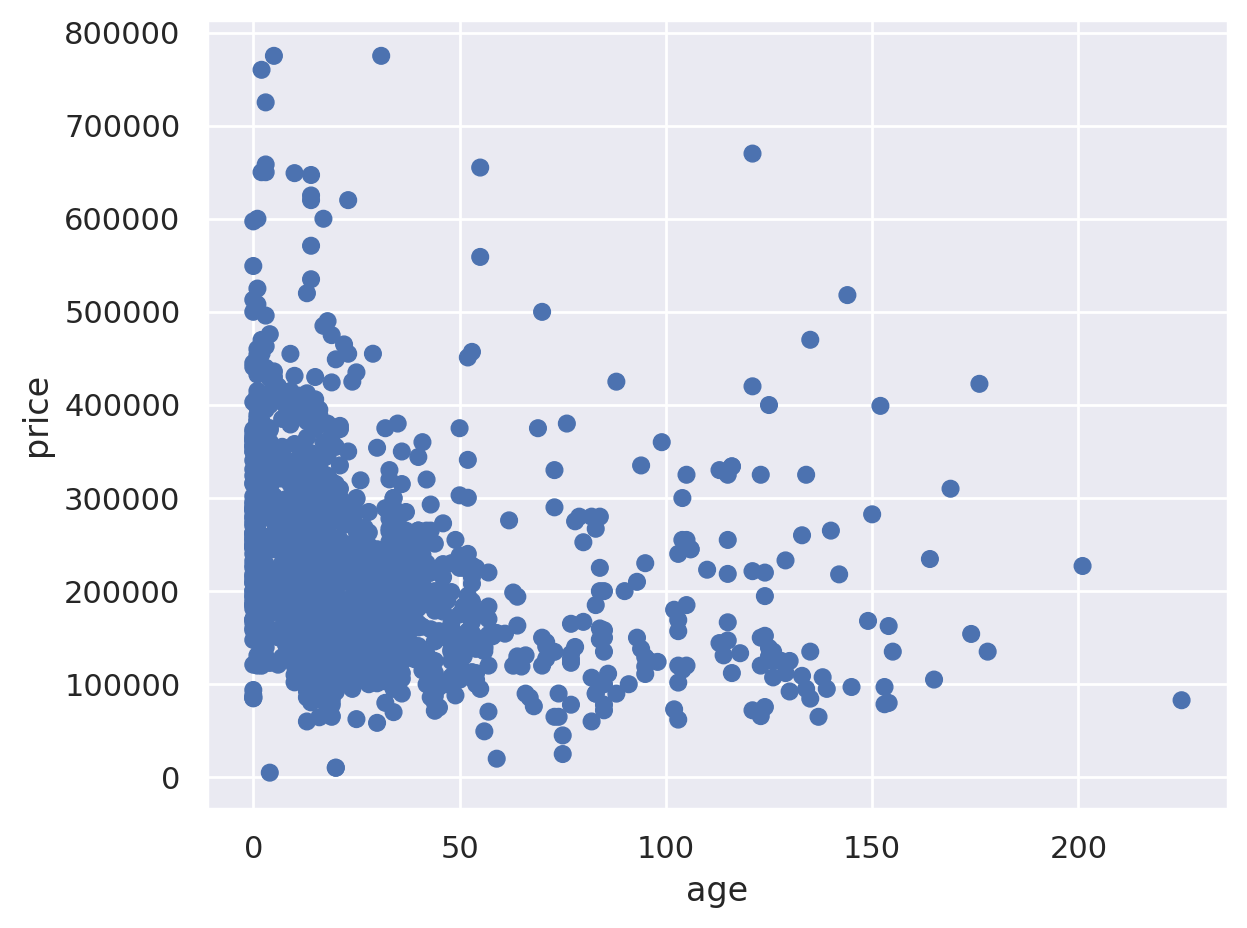

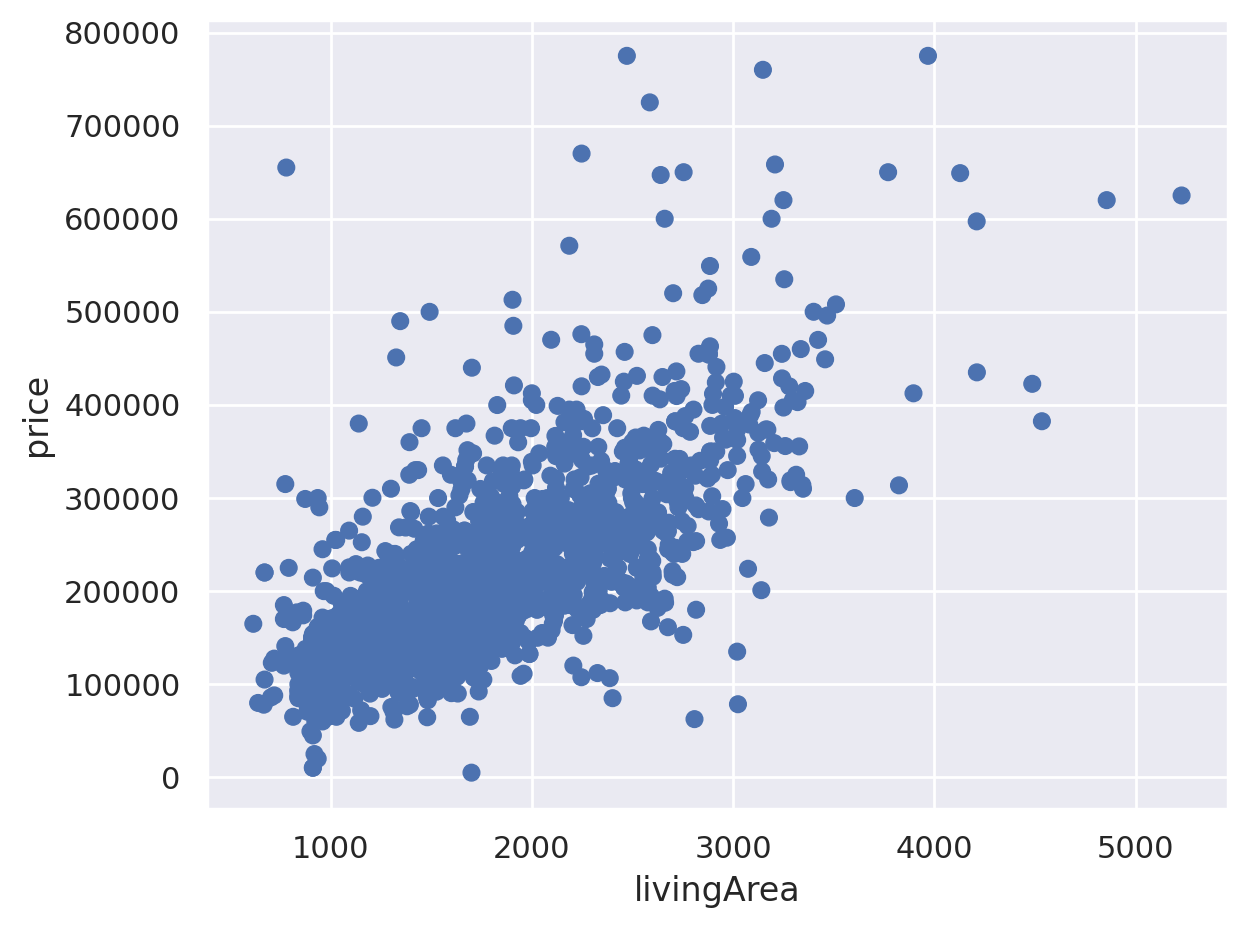

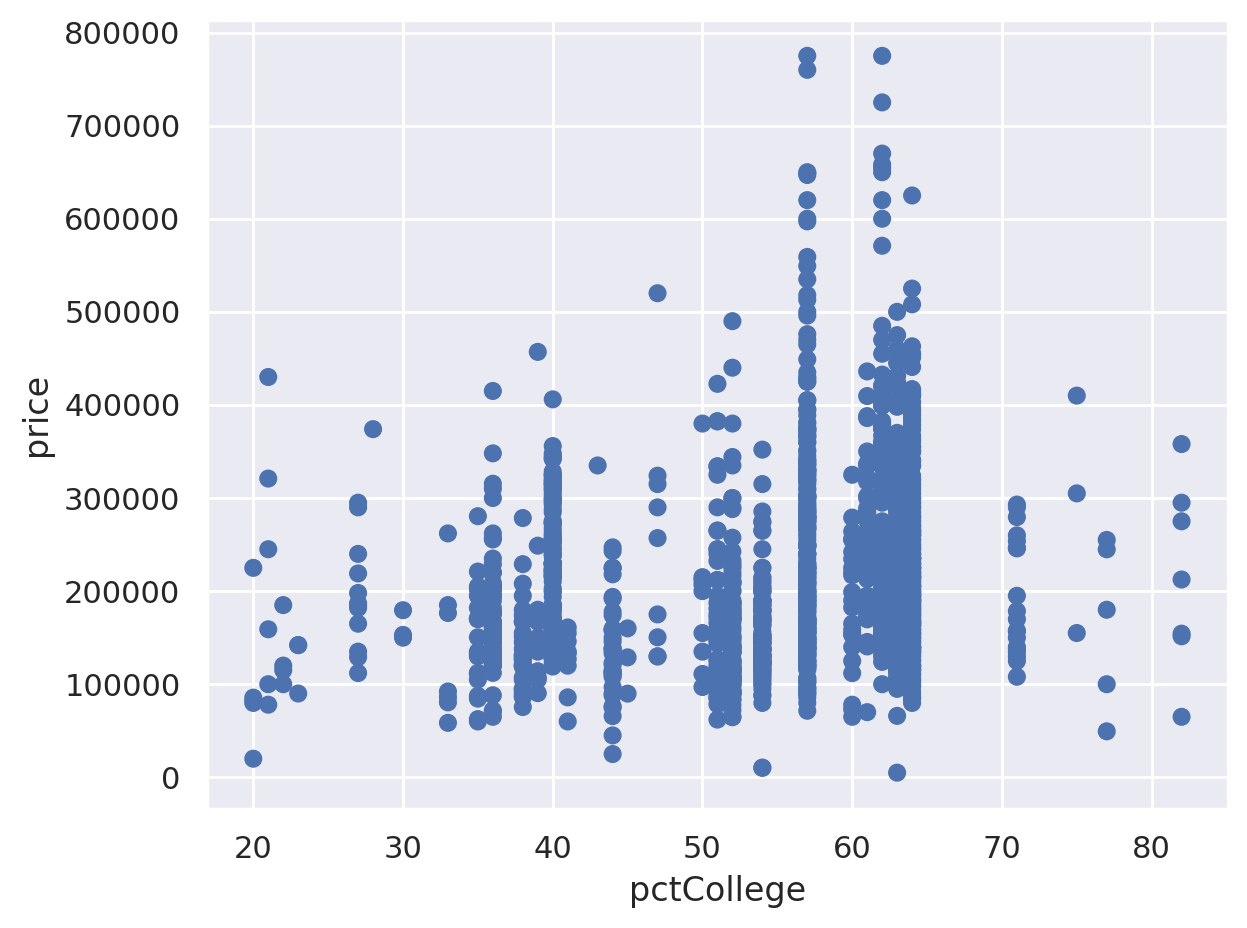

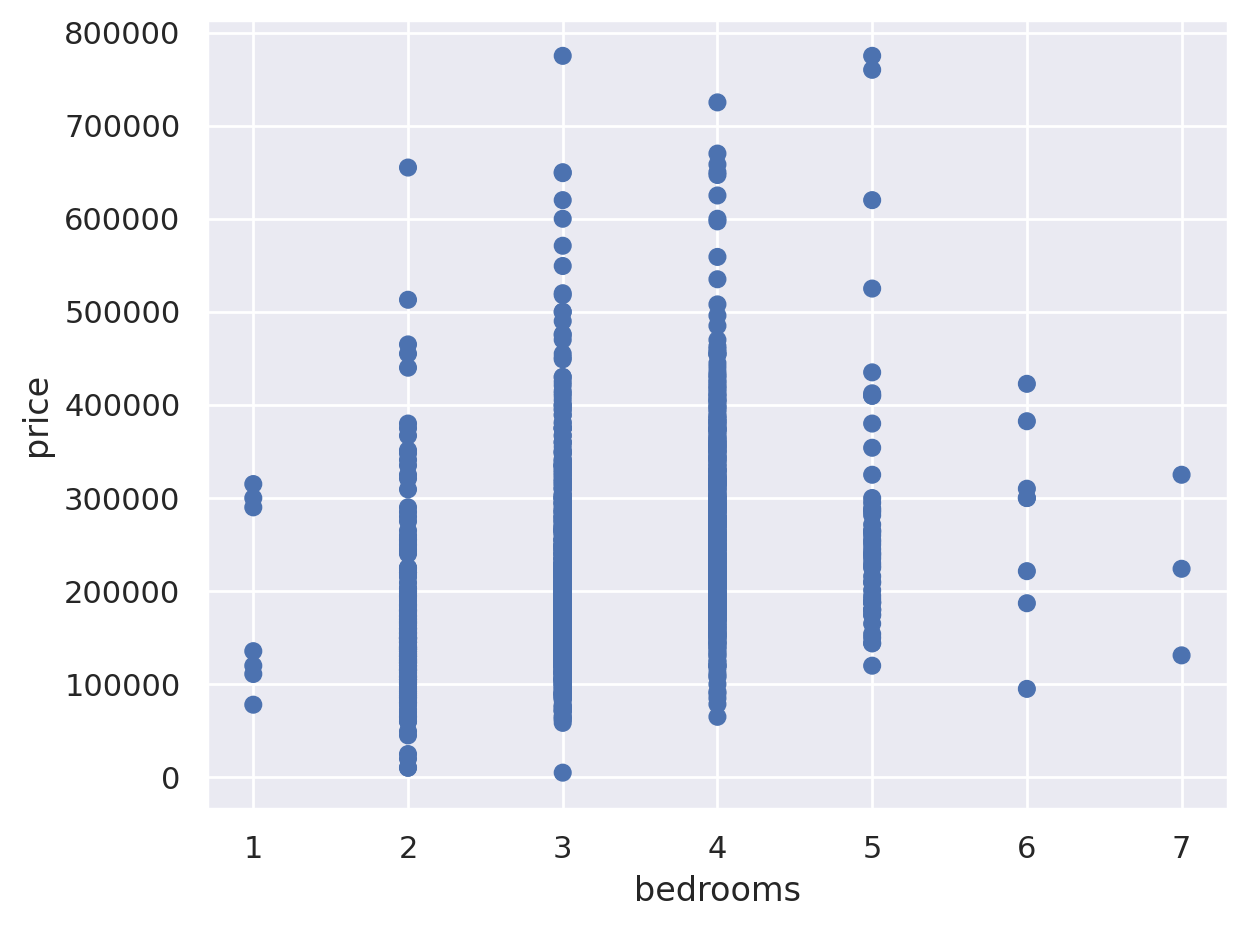

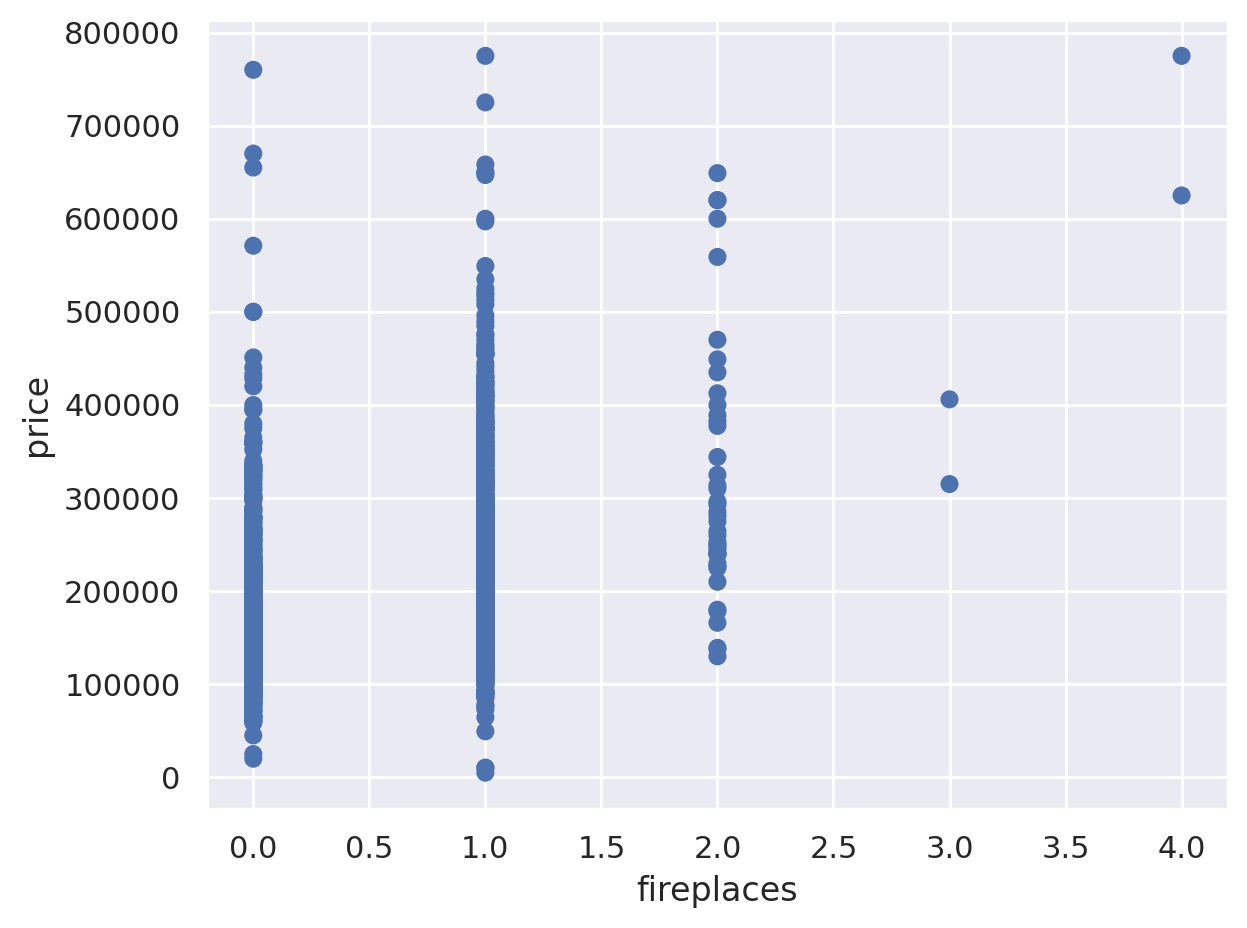

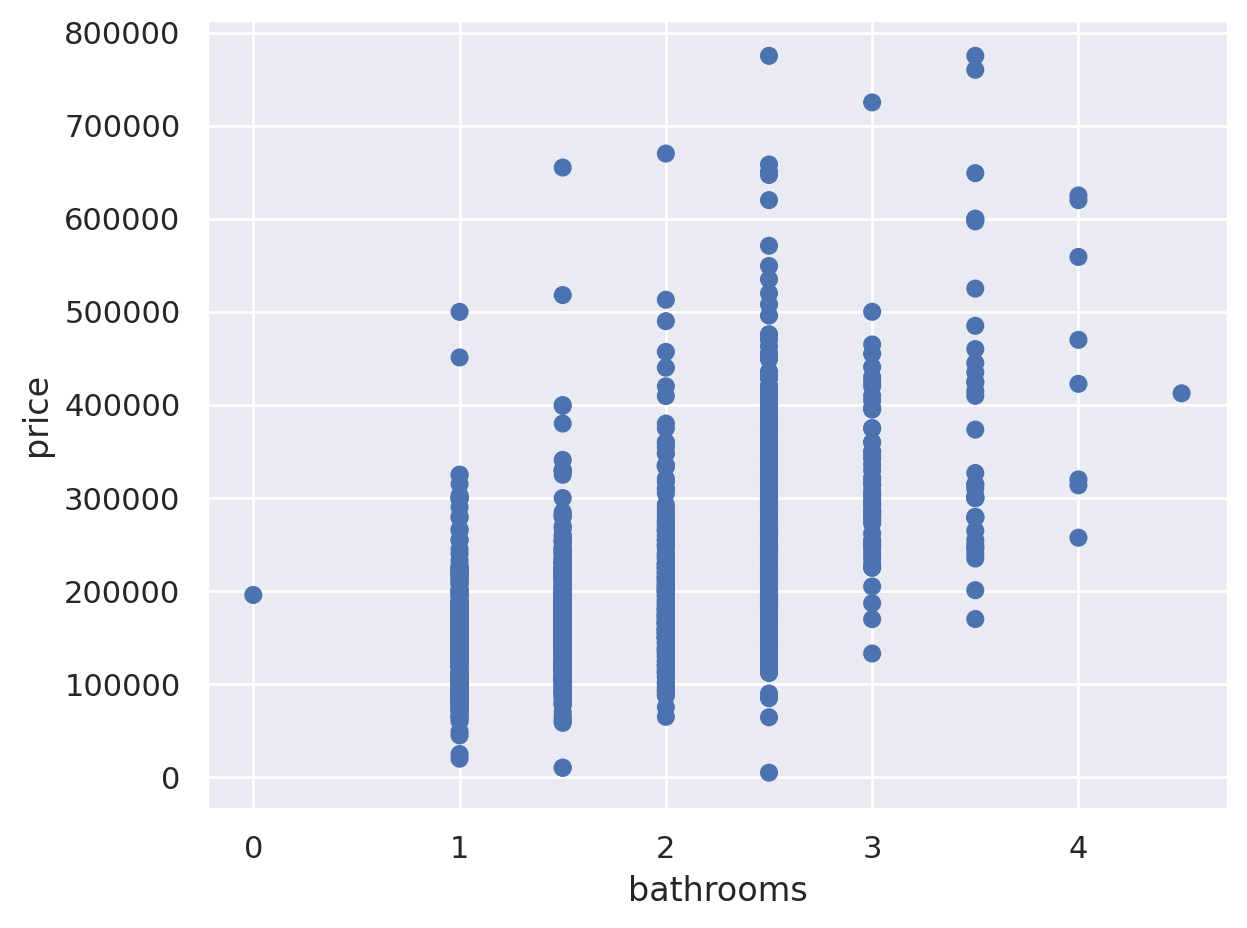

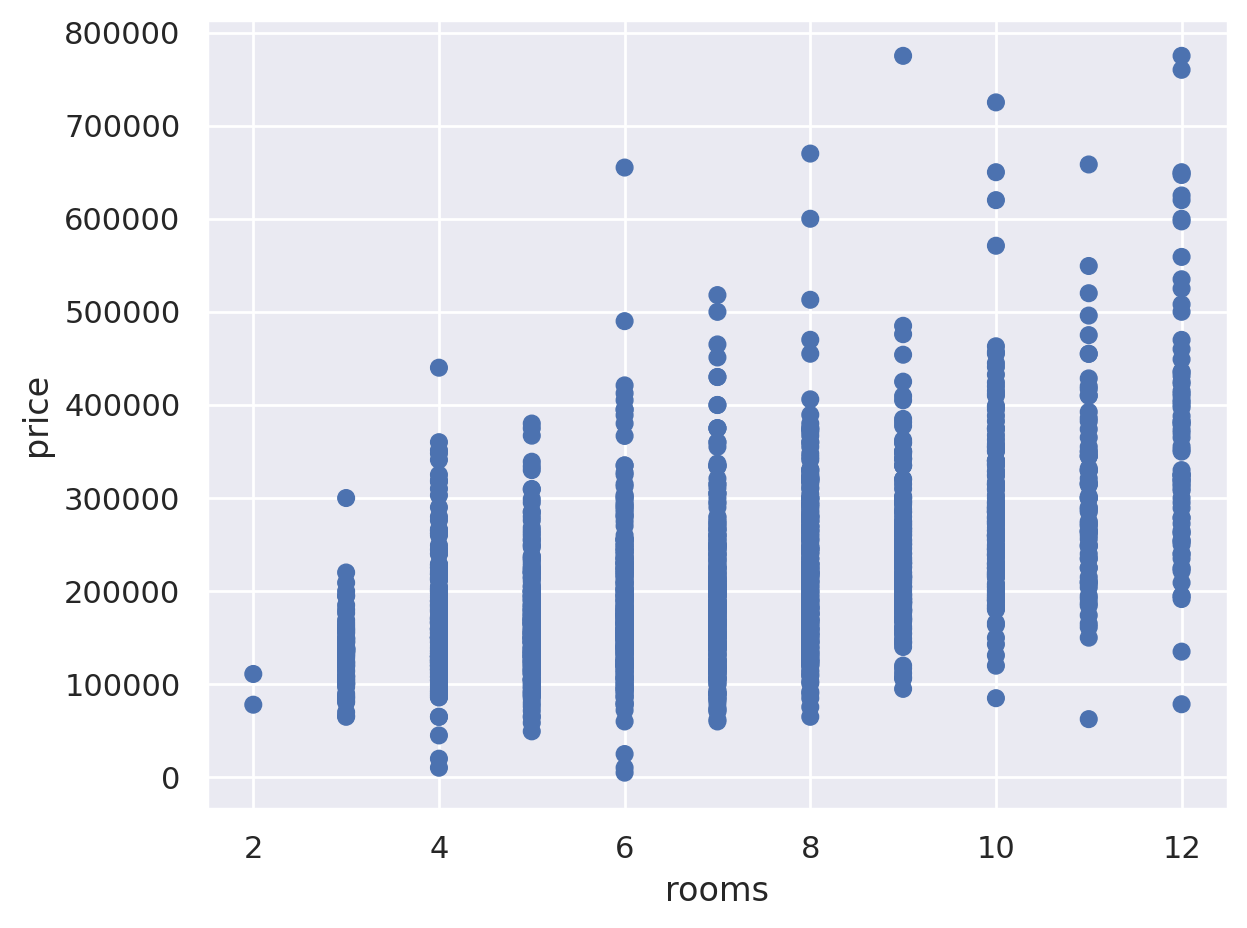

In [68]:
# Q. numeric 변수과 가격(price)는 어떤 관계가 있는가?
numeric_list = ['lotSize', 'age', 'livingArea', 'pctCollege', 'bedrooms', 'fireplaces', 'bathrooms', 'rooms']

for numeric in numeric_list:
    (
    so.Plot(houses, x=numeric, y="price")
    .add(so.Dot())
    ).show()

## Q. categorical 변수들과 가격(price)는 어떤 관계가 있는가?
### 난방용 연료(fuel)에서 gas fuel이 평균이 제일 높다.

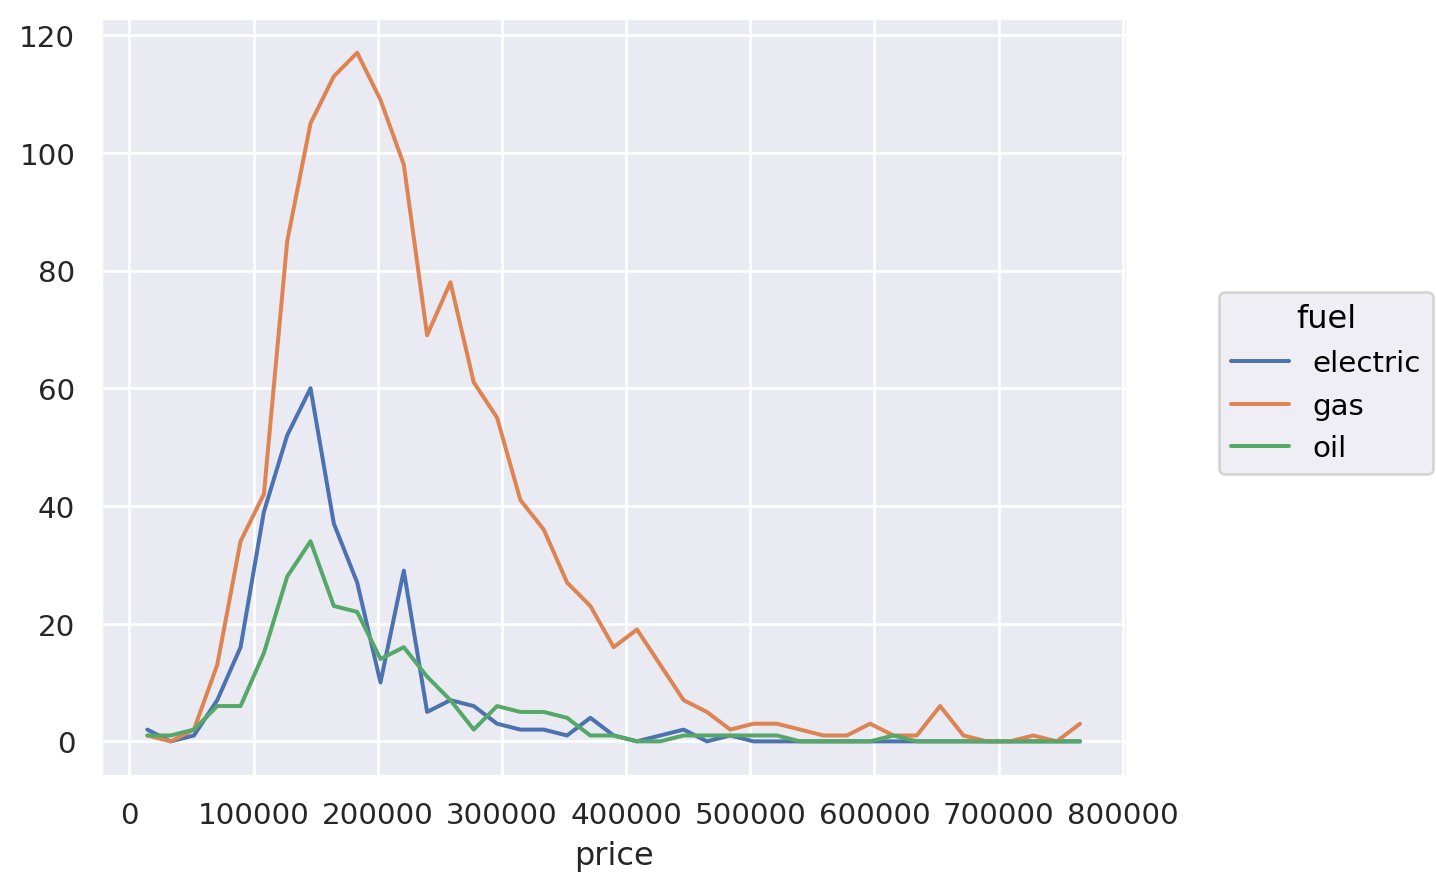

In [70]:
(
    so.Plot(houses, x="price", color="fuel")
    .add(so.Line(), so.Hist())
)

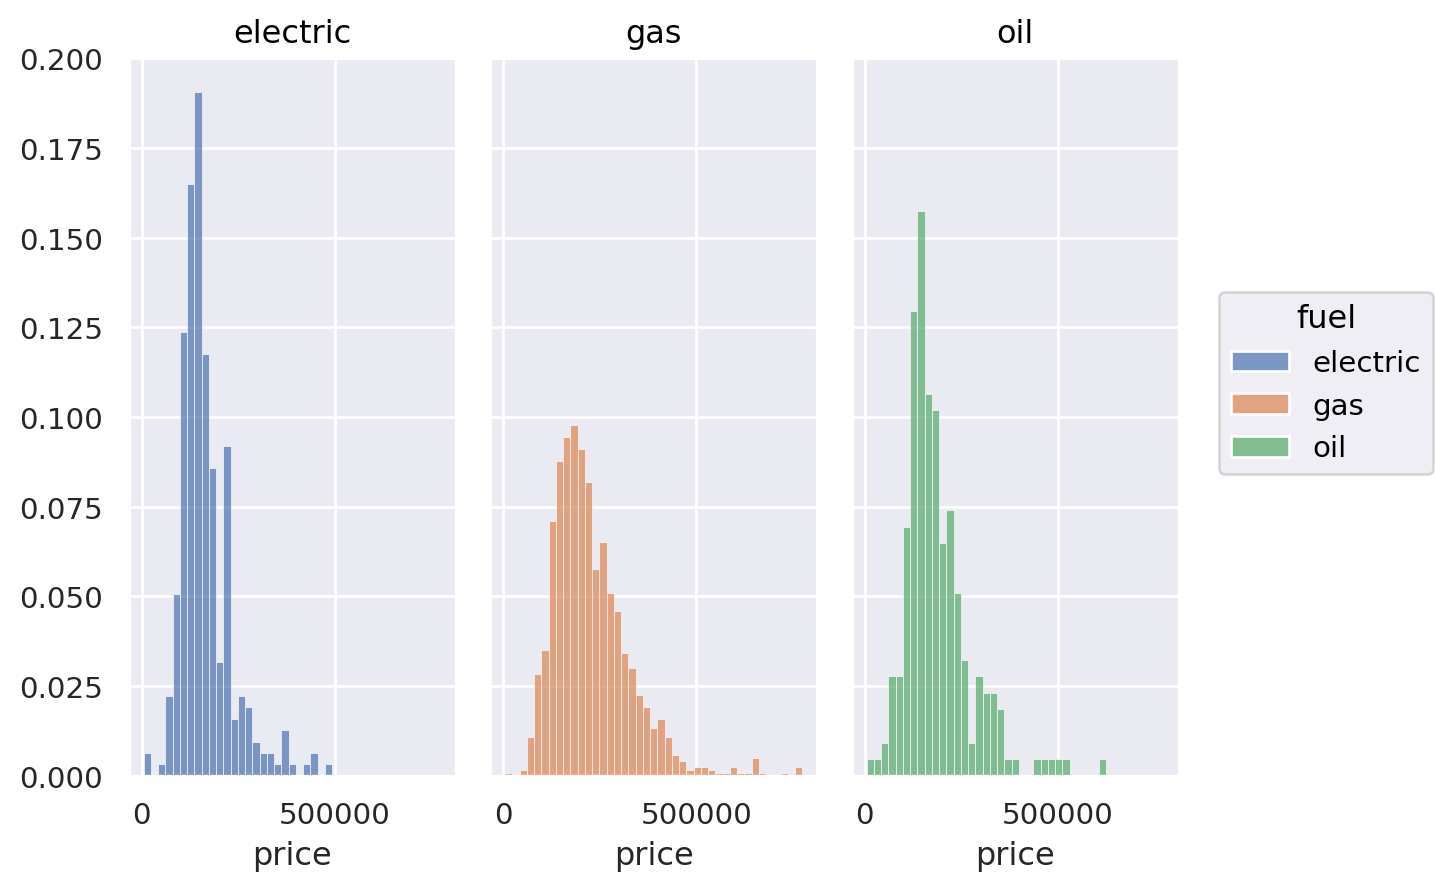

In [72]:
(
    so.Plot(houses, x="price", color="fuel")
    .add(so.Bars(), so.Hist(stat="proportion", common_norm=False))
    .facet("fuel")
)

<Axes: xlabel='fuel', ylabel='price'>

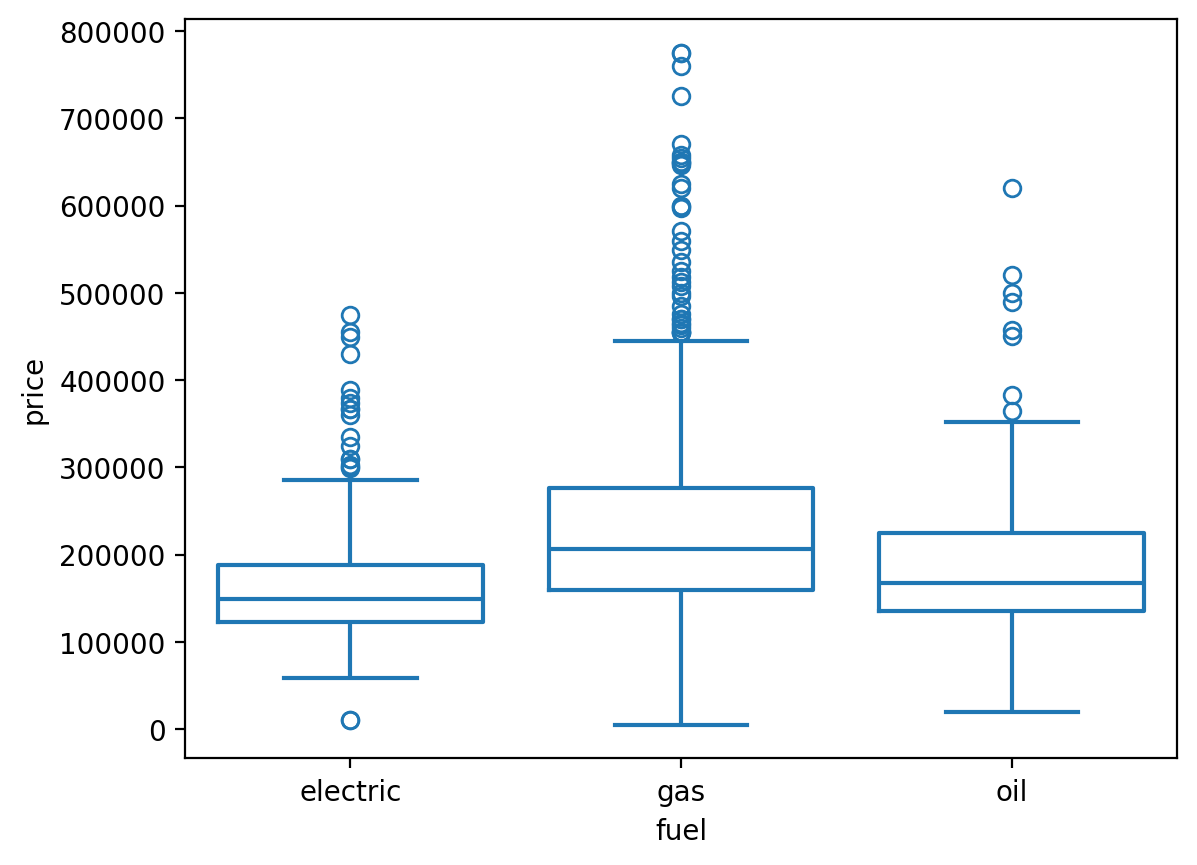

In [76]:
sns.boxplot(houses, x="fuel", y="price", fill=False)

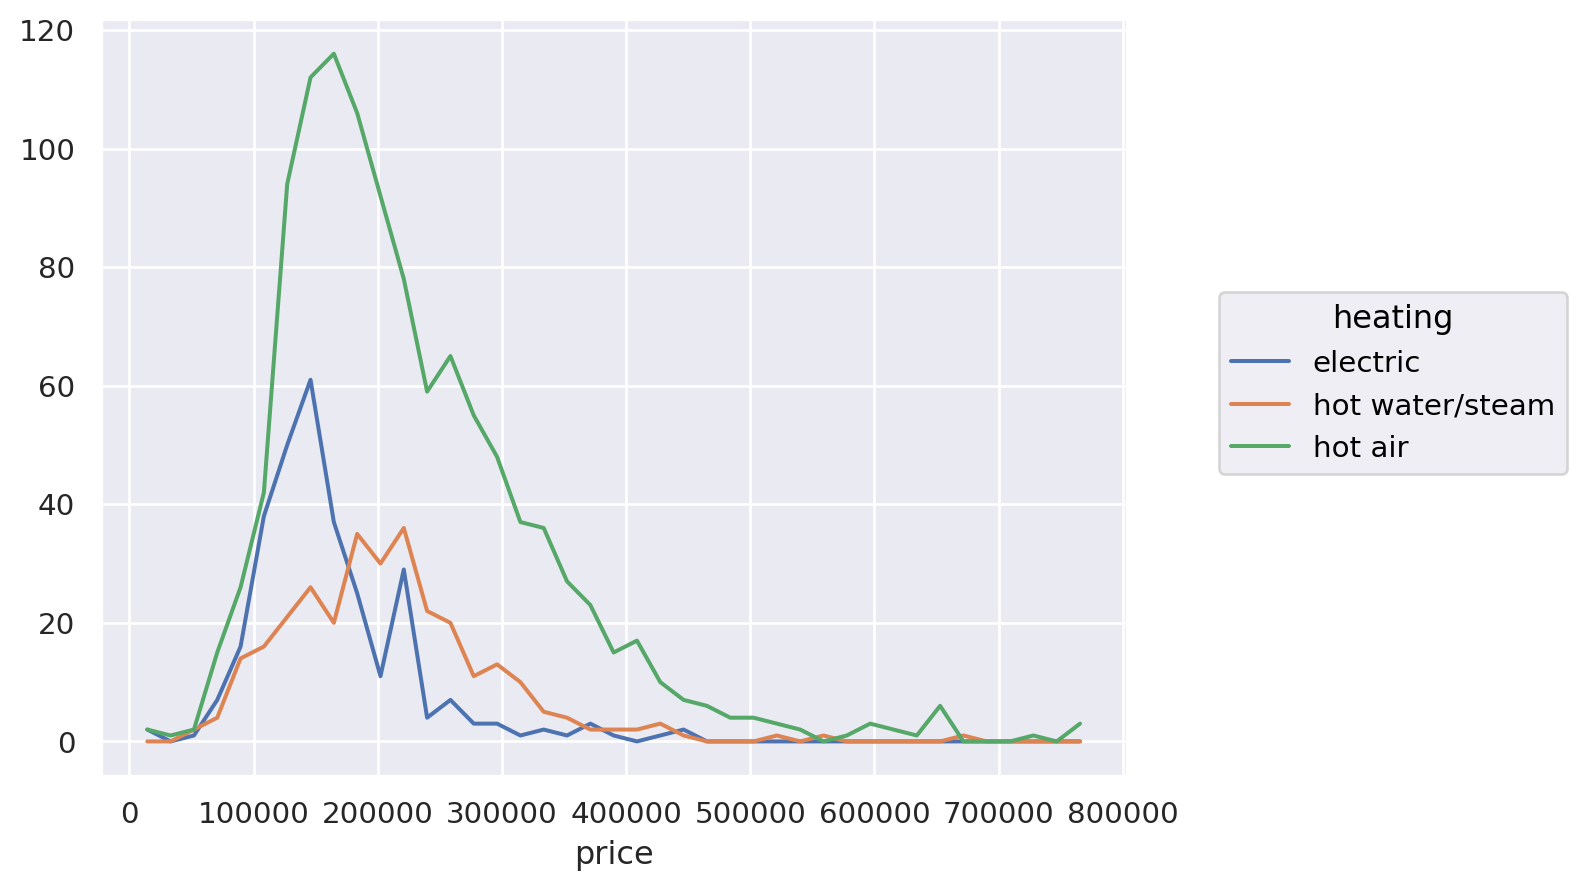

In [73]:
(
    so.Plot(houses, x="price", color="heating")
    .add(so.Line(), so.Hist())
)

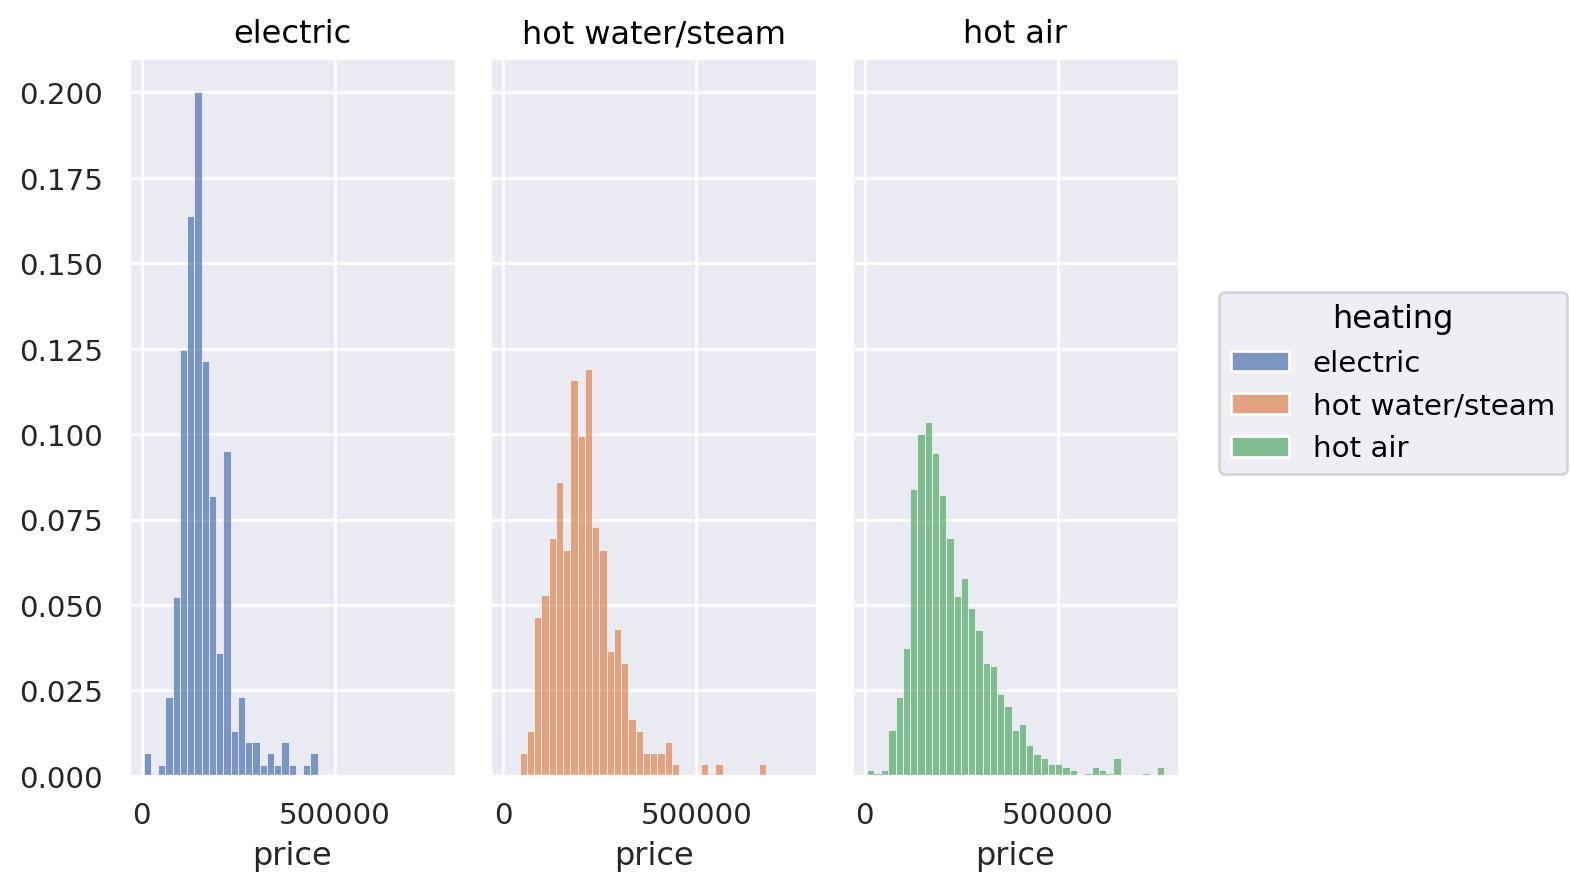

In [74]:
(
    so.Plot(houses, x="price", color="heating")
    .add(so.Bars(), so.Hist(stat="proportion", common_norm=False))
    .facet("heating")
)

<Axes: xlabel='heating', ylabel='price'>

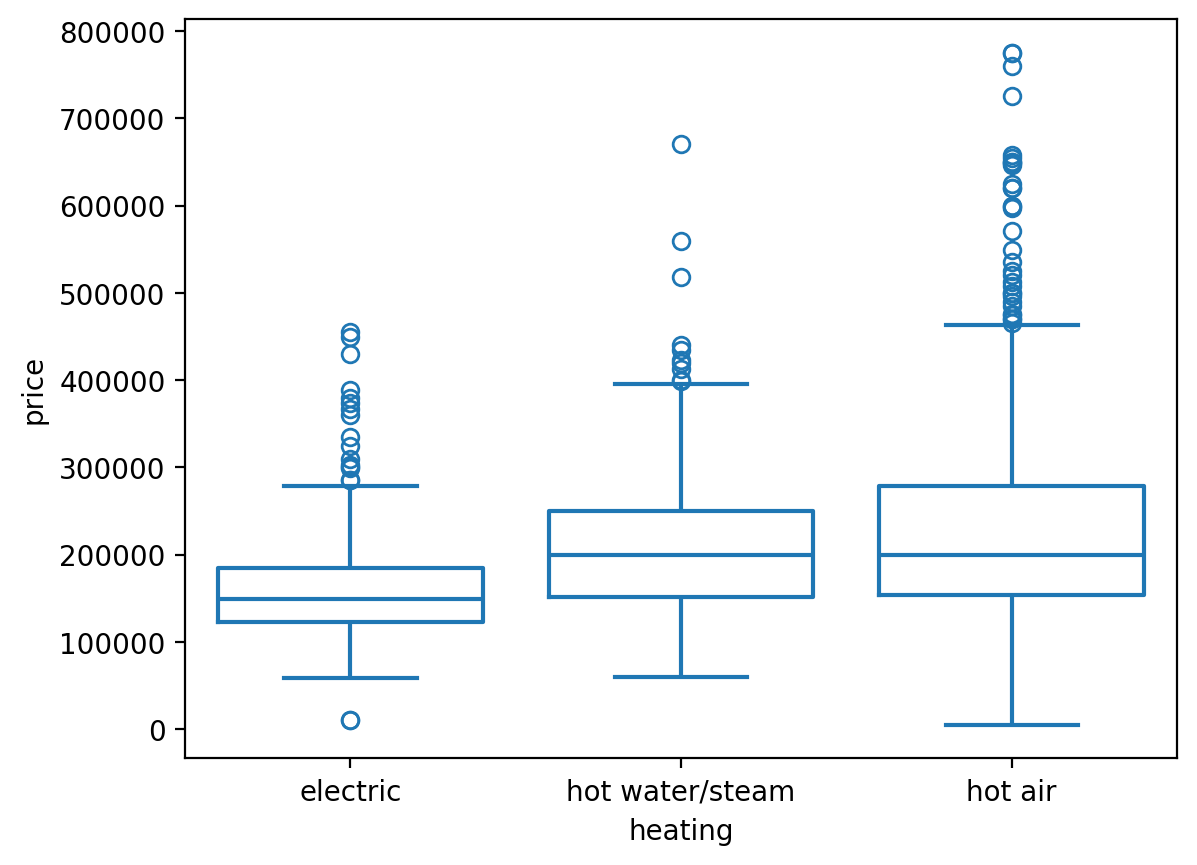

In [75]:
sns.boxplot(houses, x="heating", y="price", fill=False)

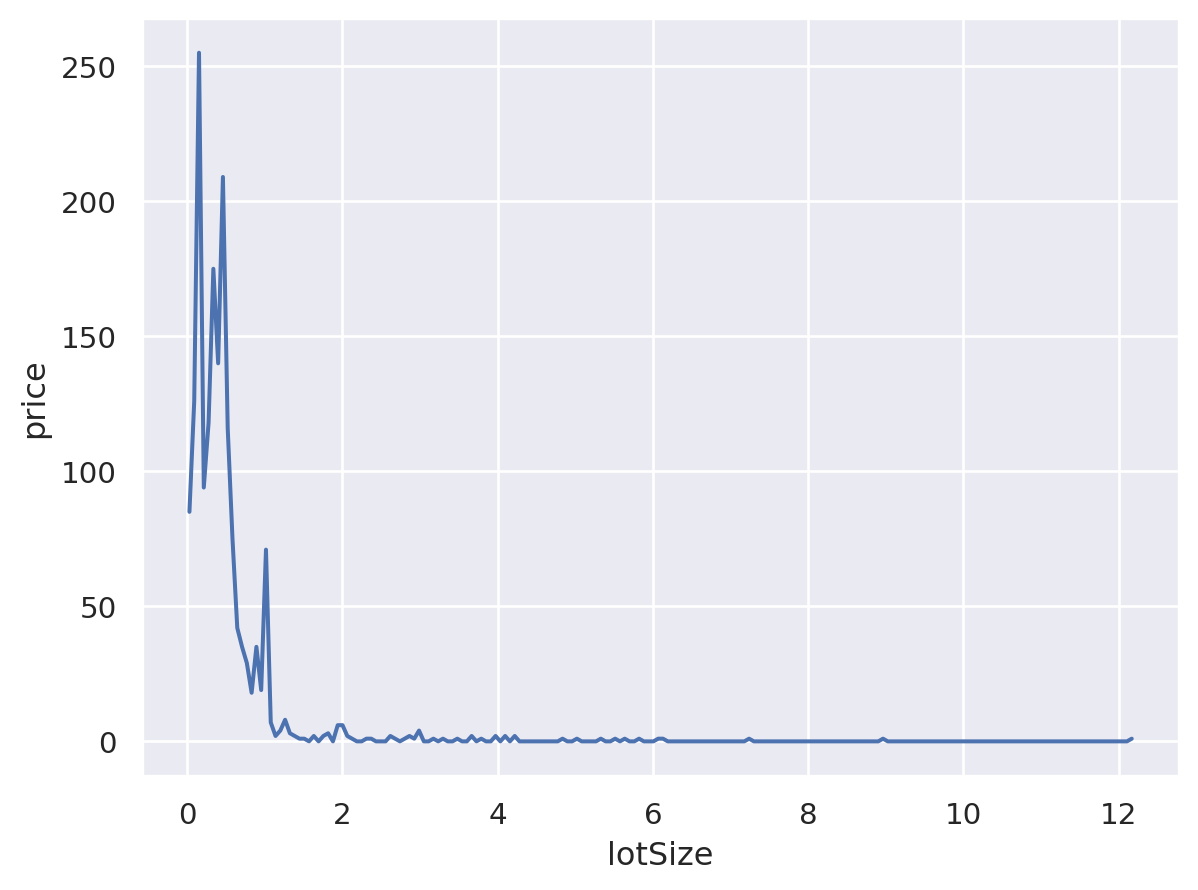

In [36]:
(
    so.Plot(houses, x="lotSize", y="price")
    .add(so.Line(), so.Hist())
)


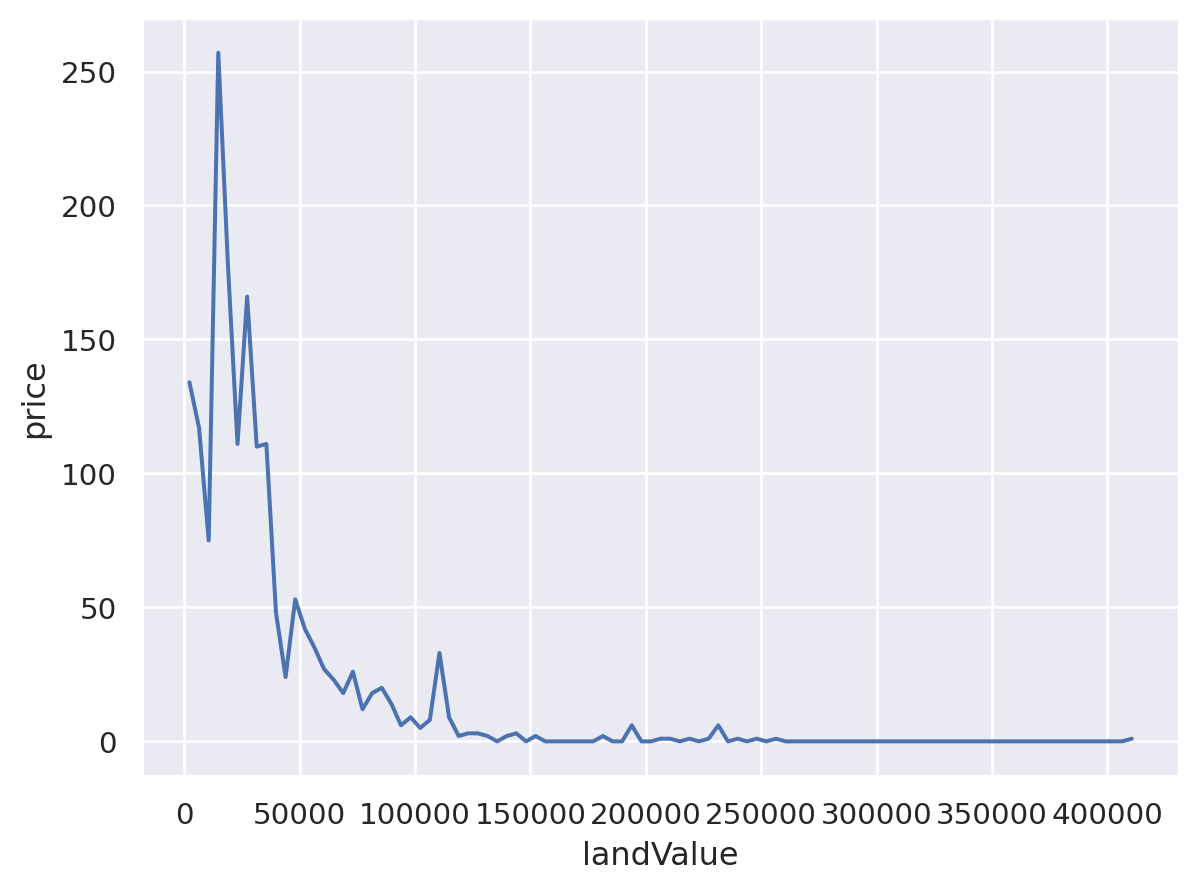

In [47]:
(
    so.Plot(houses, x="landValue", y="price")
    .add(so.Line(), so.Hist())
)


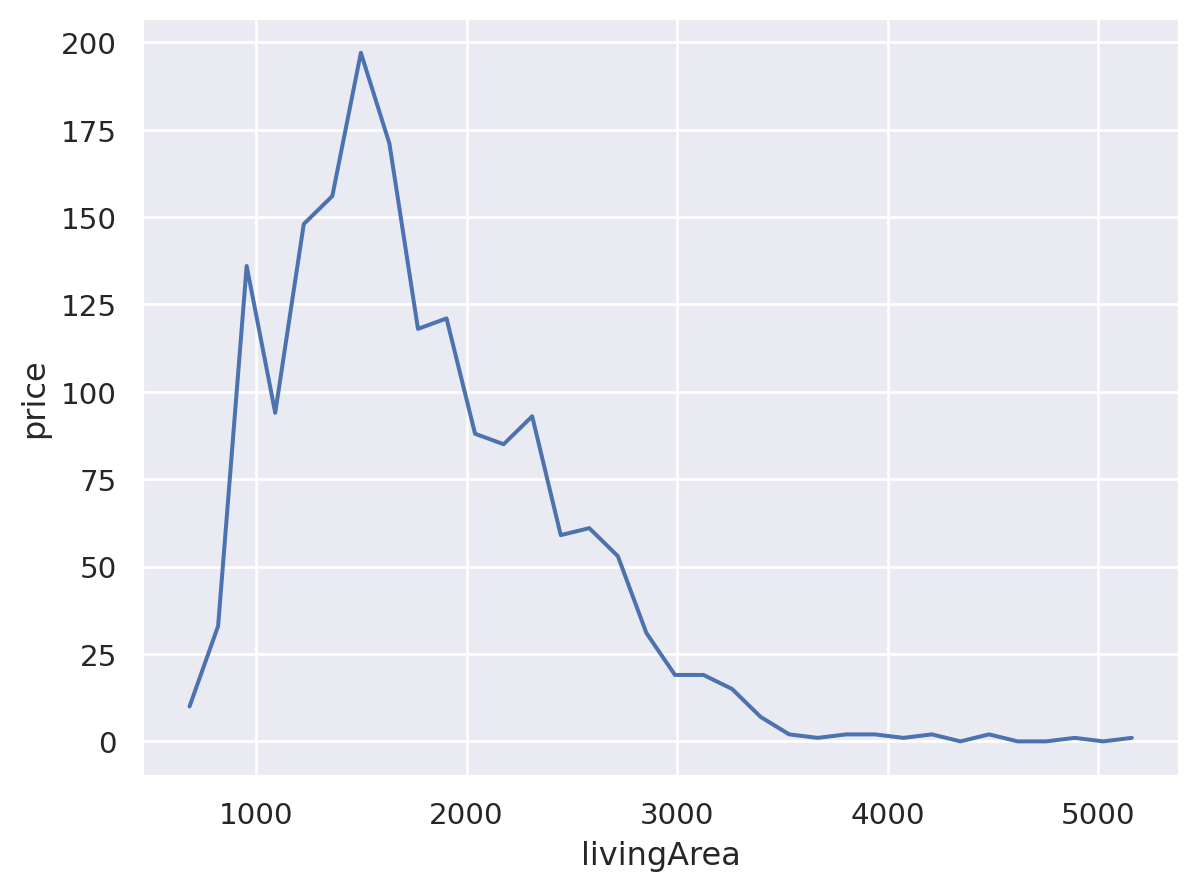

In [48]:
(
    so.Plot(houses, x="livingArea", y="price")
    .add(so.Line(), so.Hist())
)


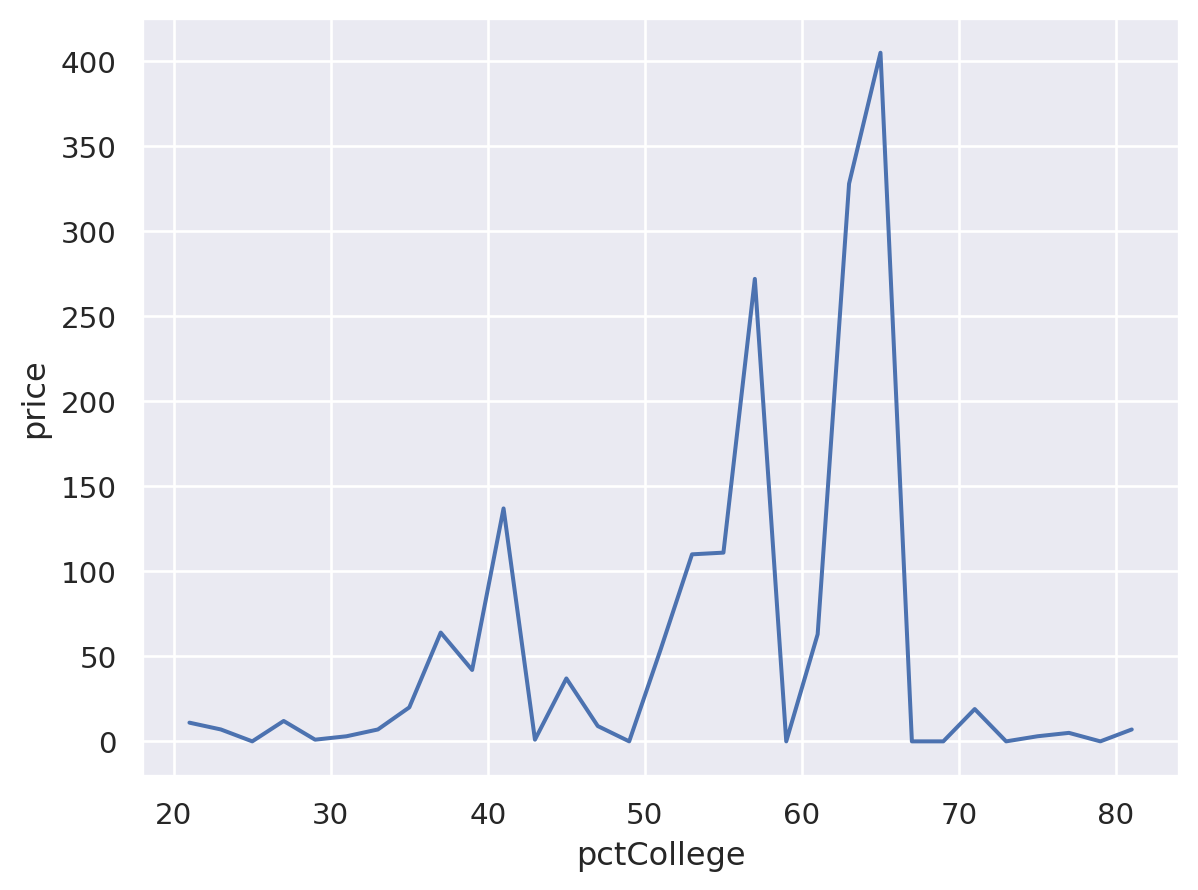

In [49]:
(
    so.Plot(houses, x="pctCollege", y="price")
    .add(so.Line(), so.Hist())
)


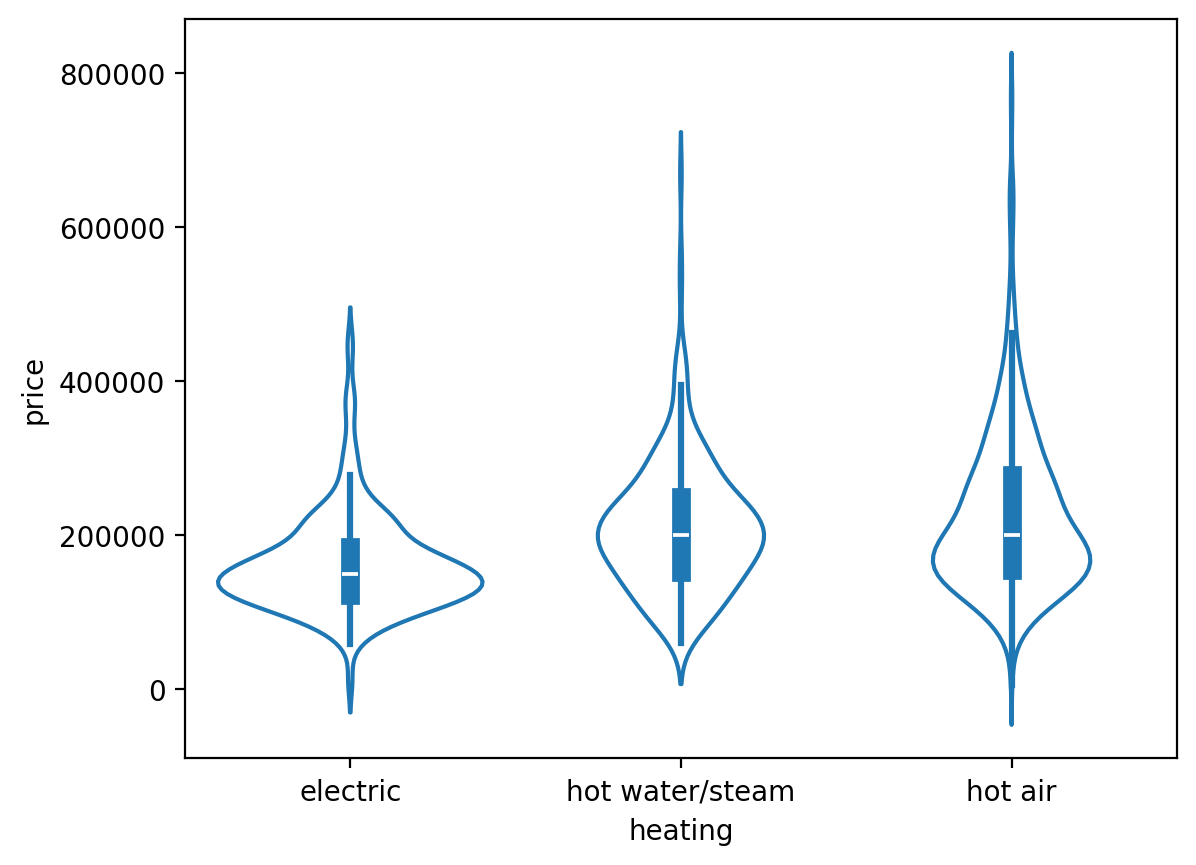

In [50]:
# Violin plot
sns.violinplot(houses, x="heating", y="price", fill=False)
plt.show()  # 생략

## 결론 - Covariation: A categorical and continuous variable

In [ ]:
table_cut = diamonds.groupby(["cut", "clarity"]).size().reset_index(name="n")
table_cut

In [ ]:
p1 = (
    so.Plot(table_cut, x="cut", y="clarity", pointsize="n", color="n")
    .add(so.Dot())
    .scale(pointsize=(5, 30))
)
p2 = (
    so.Plot(diamonds, x='cut', y='clarity')
    .add(so.Line(), so.PolyFit(3))
)

In [ ]:
plotdata = (
    gapminder
    .query('continent == "Asia"')
    .pivot(index="country", columns="year", values="lifeExp")  # wide format 변환
)
plotdata

In [ ]:
# hierarchical clustering in scipy
sns.clustermap(plotdata, col_cluster=False, method="ward")
plt.show()  # 생략

## 결론 - Covariation: Two categoricla variables

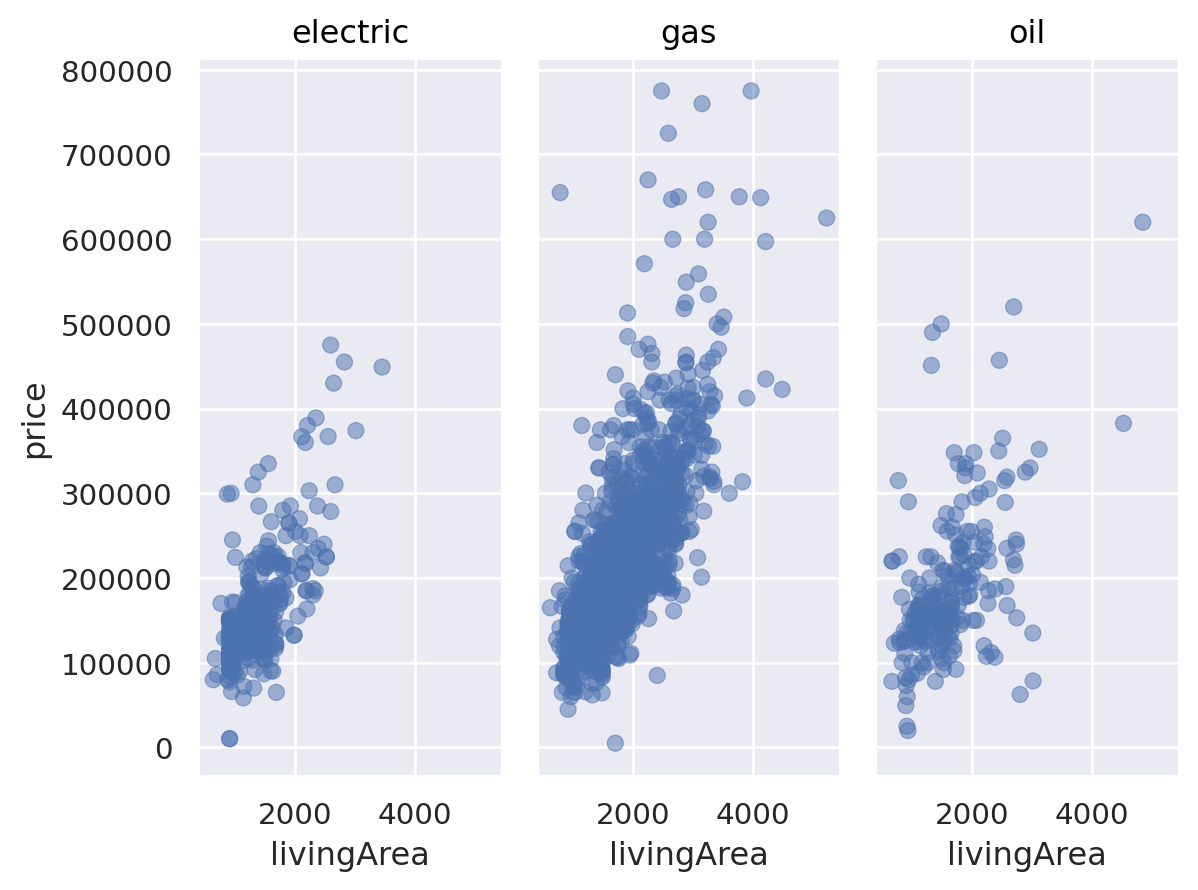

In [57]:
(
    so.Plot(houses, x="livingArea", y="price")
    .add(so.Dot(alpha=.5))
    .facet("fuel")  # 기본적으로 columns으로 나누어져 그림, wrap: column에 몇 개까지 그릴지
)

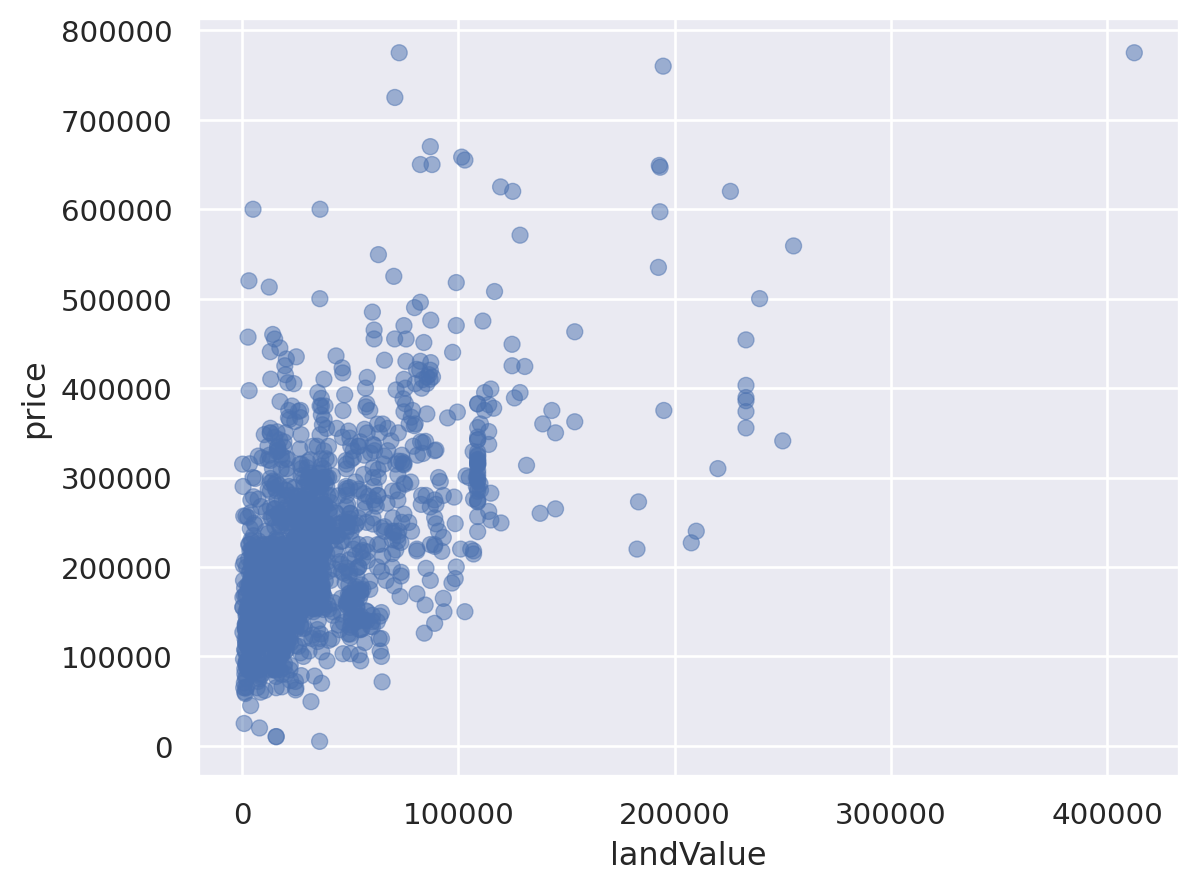

In [67]:
(
    so.Plot(houses, x="landValue", y="price")
    .add(so.Dot(alpha=.5))
)

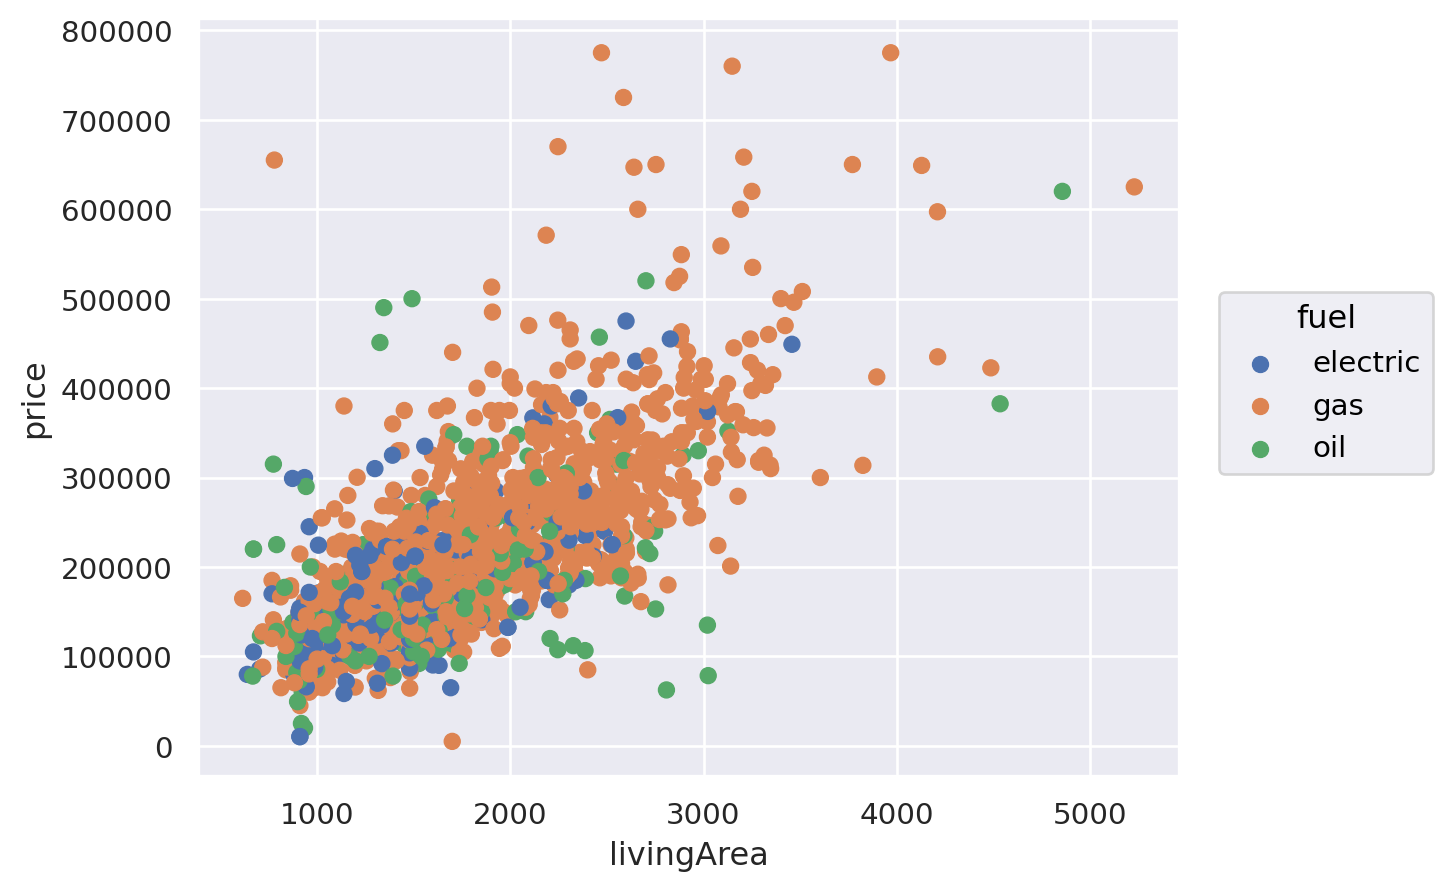

In [59]:
(
    so.Plot(houses, x="livingArea", y="price", color="fuel")
    .add(so.Dot())
)

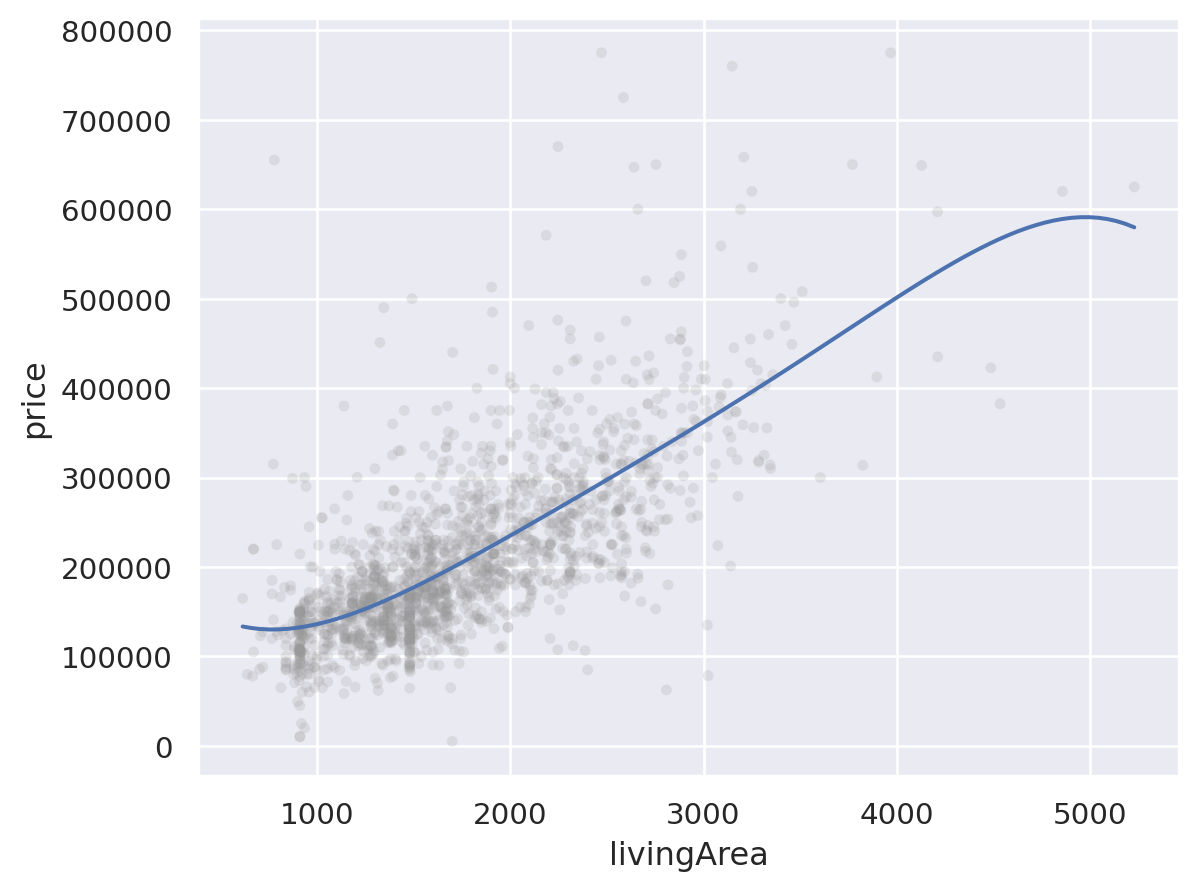

In [51]:
# Covariation: Two continuous variables
# 집 값에 가장 크게 영향을 주는 요소는? livingArea?
(
    so.Plot(houses, x="livingArea", y="price")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

## 결론 - Covariation: Two continuous variables



===== PRICE =====

기초 통계량:
count     1728.00
mean    211966.71
std      98441.39
           ...   
50%     189900.00
75%     259000.00
max     775000.00
Name: price, Length: 8, dtype: float64


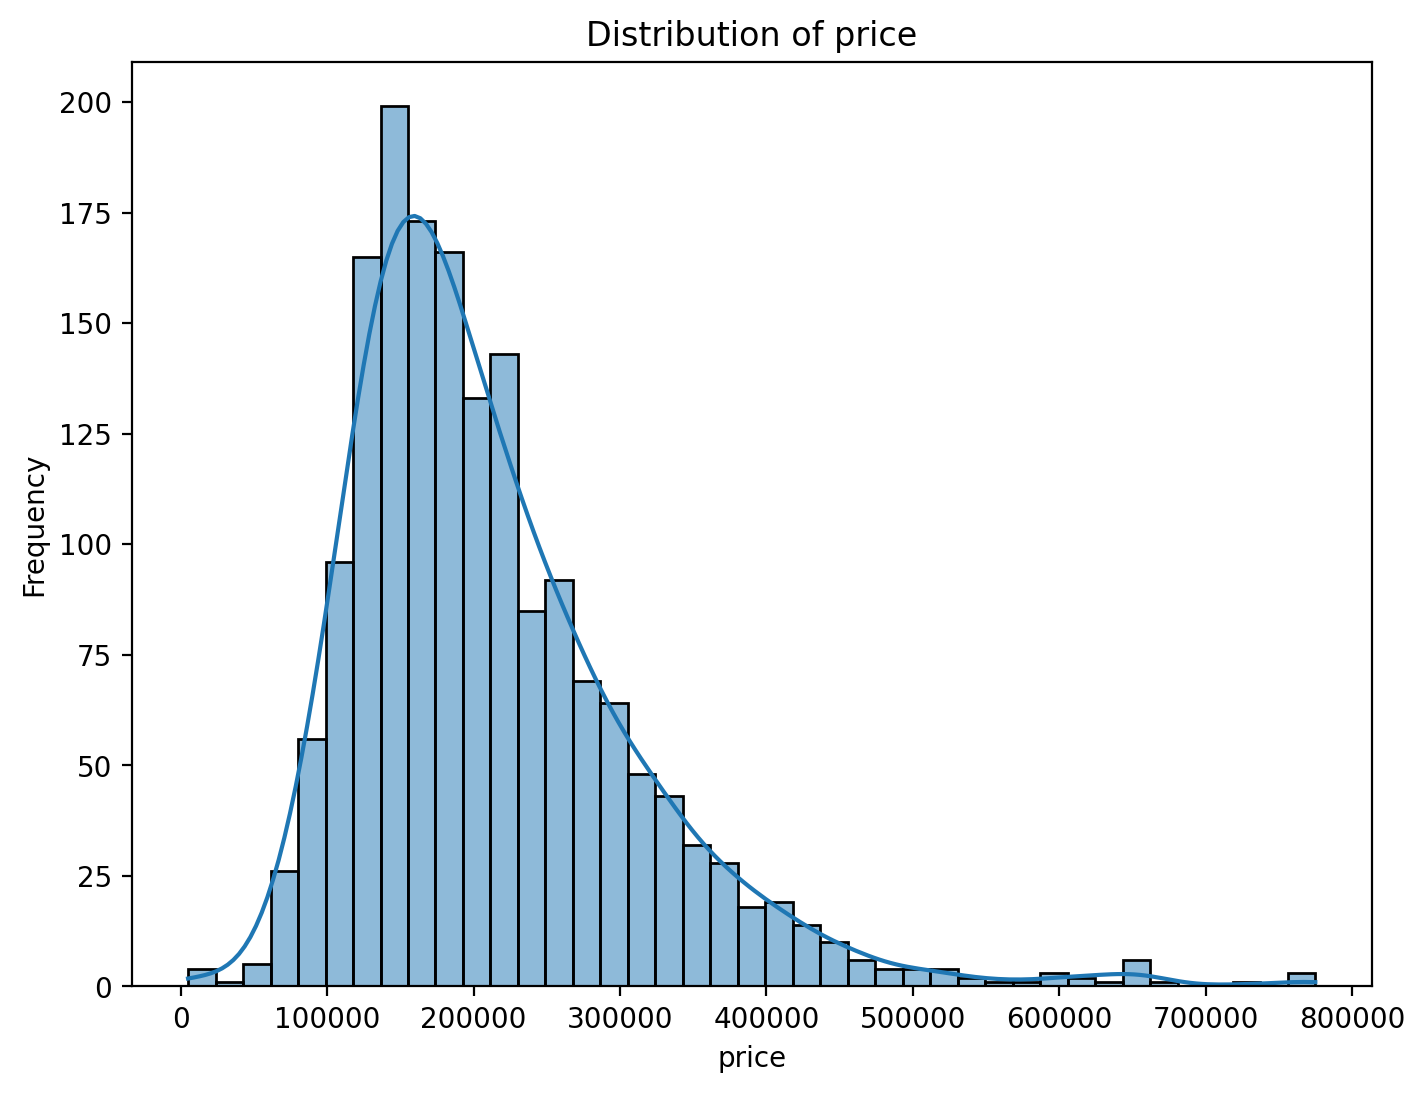



===== FUEL =====


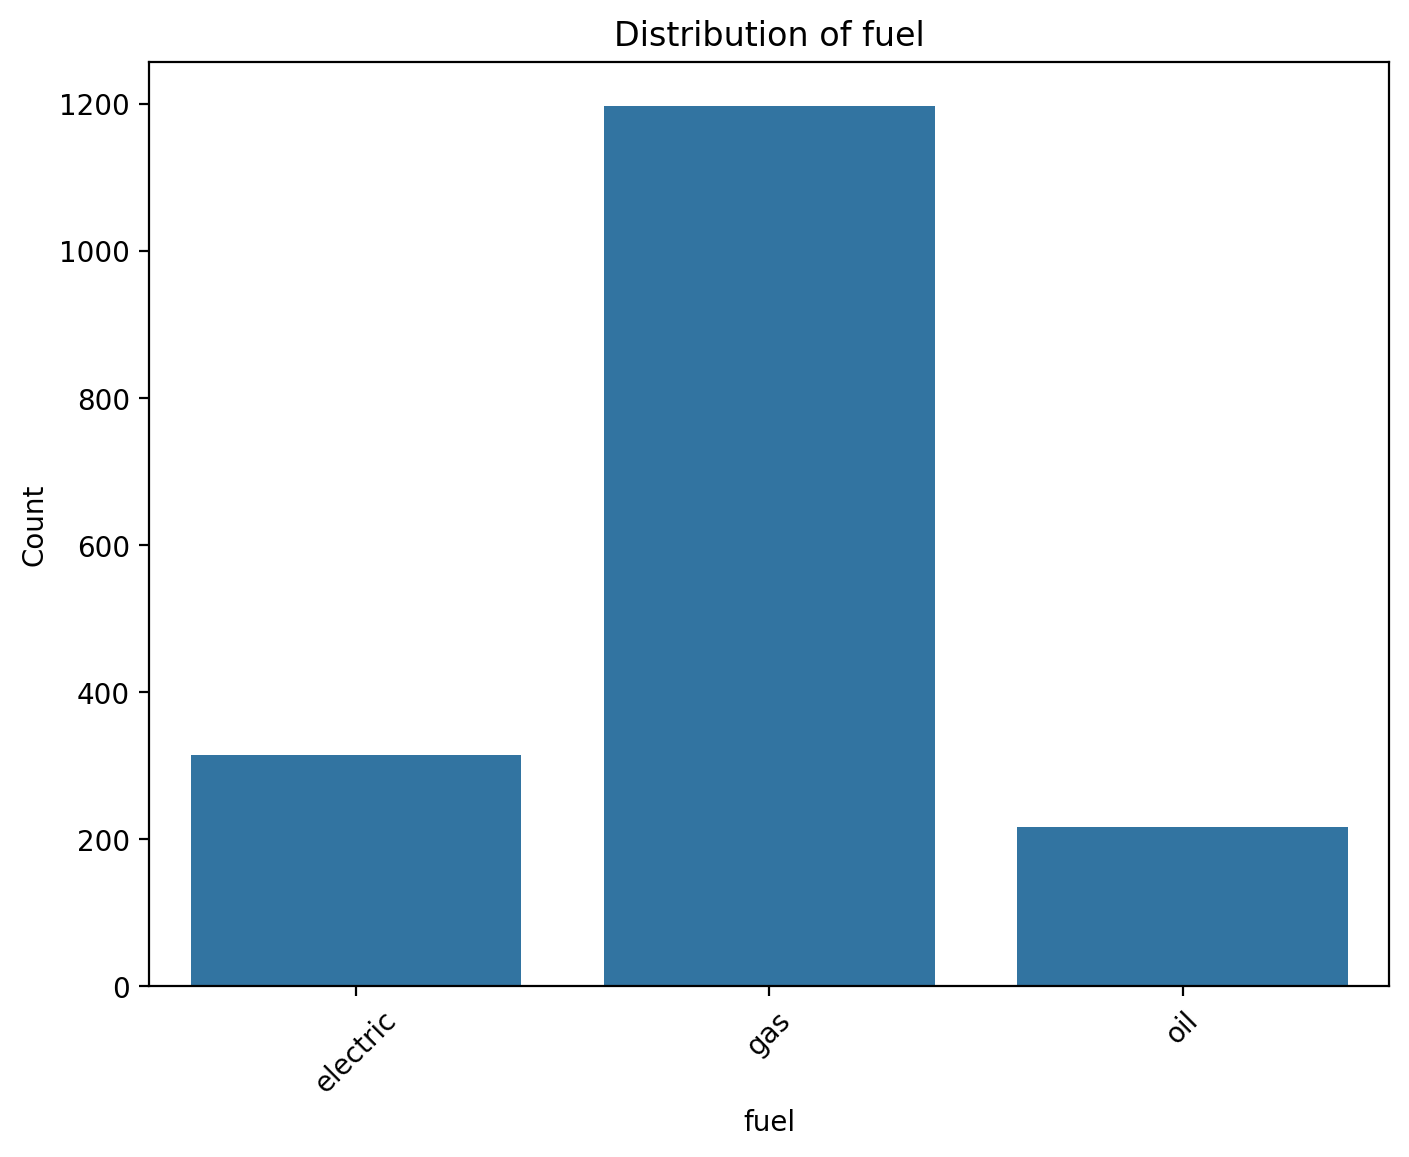

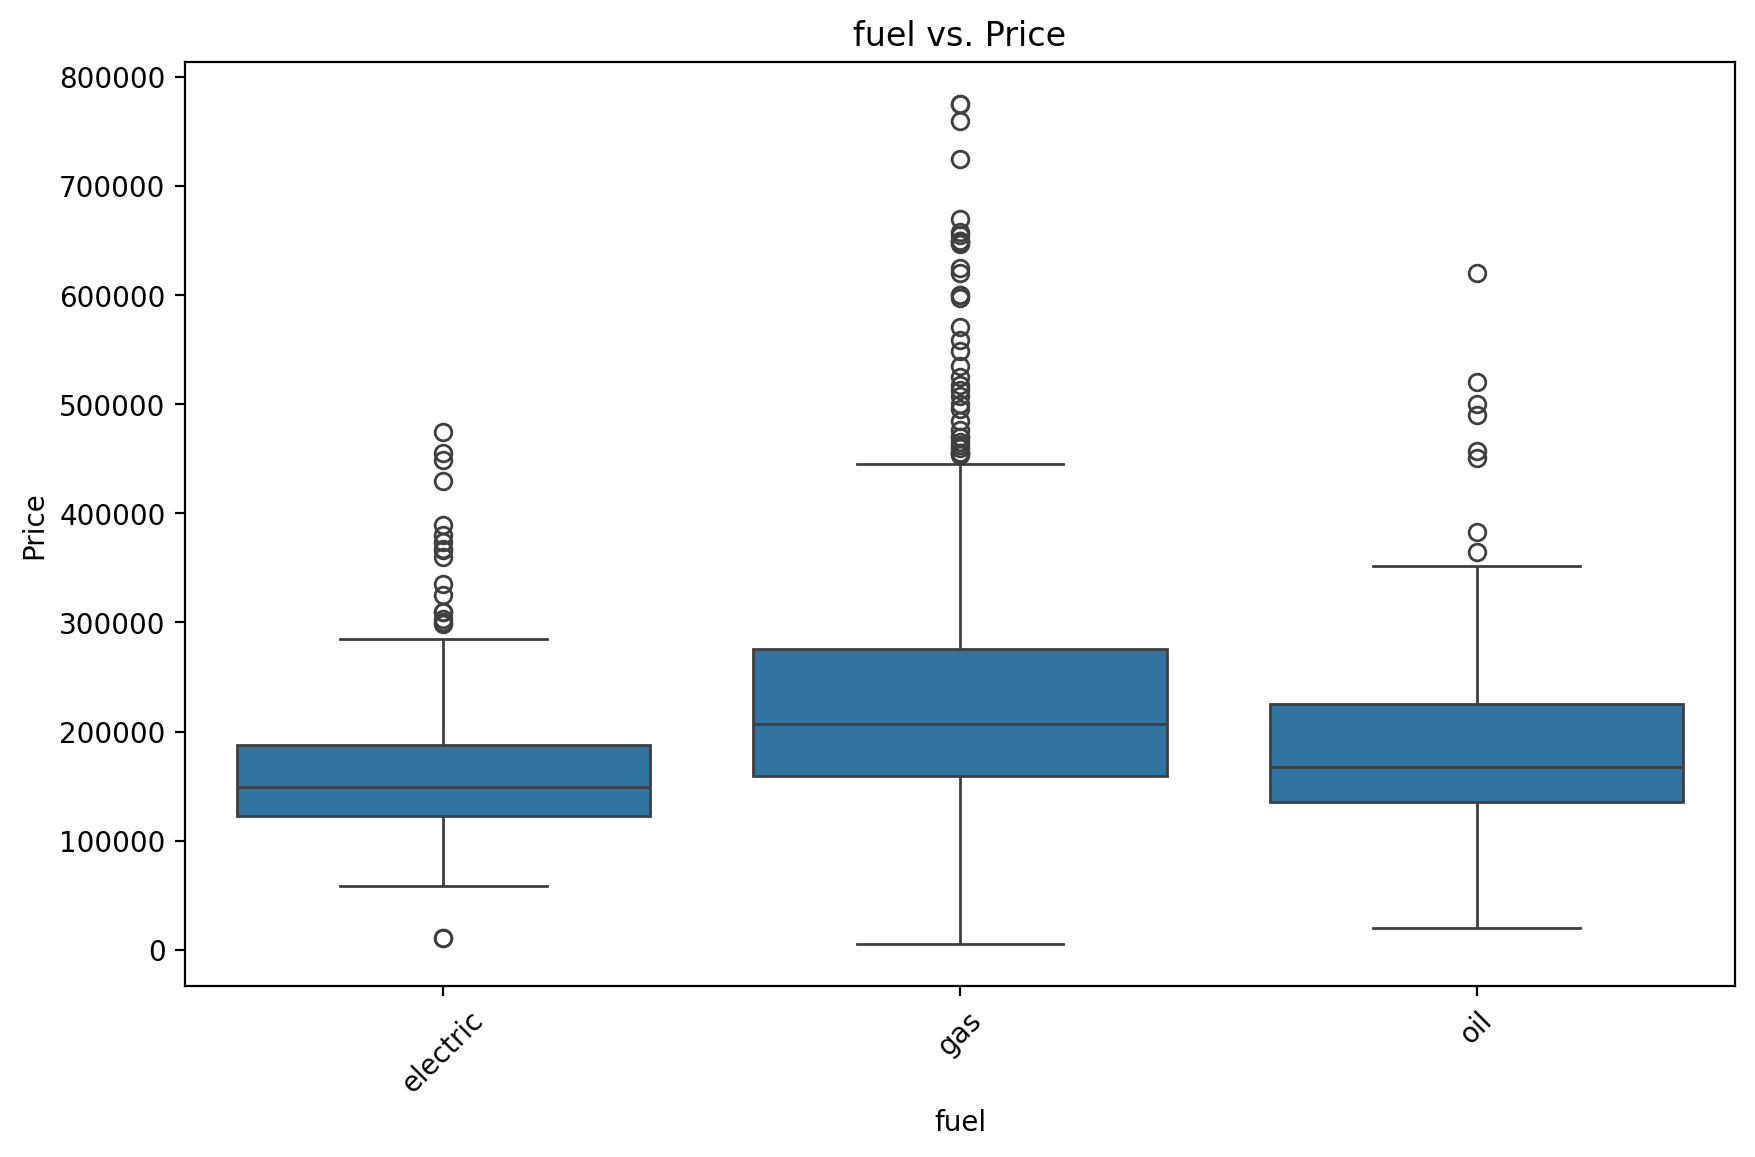



===== LOTSIZE =====

기초 통계량:
count   1728.00
mean       0.50
std        0.70
          ...  
50%        0.37
75%        0.54
max       12.20
Name: lotSize, Length: 8, dtype: float64


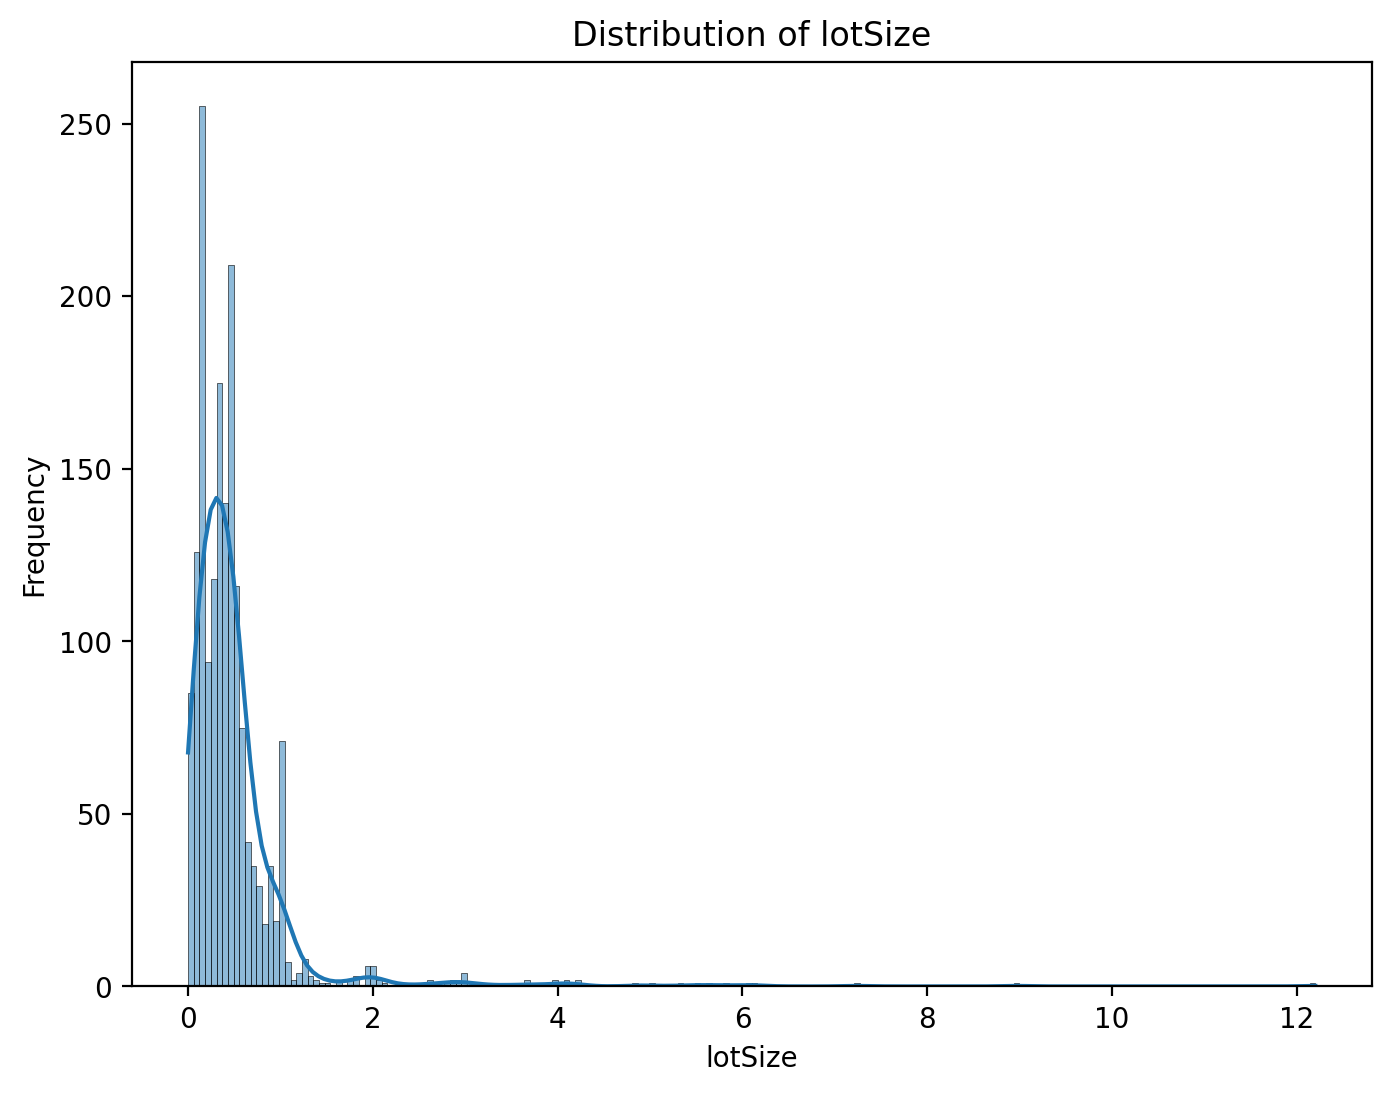

In [56]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
houses_data = sm.datasets.get_rdataset("SaratogaHouses", "mosaicData")
houses = houses_data.data

# 관심 변수 선택
interested_variables = [
    'price',            # 주택 가격
    'fuel',             # 주택 연료 종류
    'lotSize',          # 부지 크기
]

# 관심 변수에 대한 EDA 분석
for variable in interested_variables:
    print(f"\n\n===== {variable.upper()} =====")
    if pd.api.types.is_numeric_dtype(houses[variable]):
        # 기초 통계량 출력
        print("\n기초 통계량:")
        print(houses[variable].describe())

        # 분포 시각화
        plt.figure(figsize=(8, 6))
        sns.histplot(houses[variable], kde=True)
        plt.title(f"Distribution of {variable}")
        plt.xlabel(variable)
        plt.ylabel("Frequency")
        plt.show()
    else:
        # 범주형 변수의 분포 시각화
        plt.figure(figsize=(8, 6))
        sns.countplot(data=houses, x=variable)
        plt.title(f"Distribution of {variable}")
        plt.xlabel(variable)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

        # 범주별 주택 가격의 분포 시각화
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=houses, x=variable, y='price')
        plt.title(f"{variable} vs. Price")
        plt.xlabel(variable)
        plt.ylabel("Price")
        plt.xticks(rotation=45)
        plt.show()
